# <b>PART I : Building a Basic Neural Network</b>

In this part, you will implement a neural network using the PyTorch framework. You will train the network on the dataset provided, which contains of seven features and a target. Your goal is to predict a target, that has a binary representation.

### <b>Step 1: Loading the Dataset and main statistics</b>

In [ ]:
'''
1. Load the dataset (dataset.csv). It is provided on UBlearns > Assignments.
You can use the pandas library to load the dataset into a DataFrame
'''

# First we will mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries (that are required as of now / Initially)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading and printing the dataset

df = pd.read_csv("/content/drive/MyDrive/Datasets/dataset_ML.csv")
df

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,e,0
762,10,101,76,48,180,d,0.171,0
763,2,122,70,27,b,36.8,0.34,0
764,c,121,72,23,112,26.2,0.245,0


In [ ]:
'''
2. Analyze the dataset, e.g., return the main statistics.
'''

# Showing the main statistics

# This code is taken from "Assignment 1 and Assignment 0"

df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [ ]:
# We want to know the shape of the dataset

# This code is taken from "Assignment 1 and Assignment 0"

df.shape

(766, 8)

In [ ]:
# Lets print the columns of the dataset

# This code is taken from "Assignment 1 and Assignment 0"

print(df.columns.tolist())

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target']


In [ ]:
# Let us see the first 15 rows of the dataset - we just want to see a sample of
# the dataset (considering it as the population)

# This code is taken from "Assignment 1 and Assignment 0"

df.head(15)

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
5,5,116,74,0,0,25.6,0.201,0
6,3,78,50,32,88,31,0.248,1
7,10,115,0,0,0,35.3,0.134,0
8,2,197,70,45,543,30.5,0.158,1
9,8,125,96,0,0,0,0.232,1


In [ ]:
# Let us show what kind of value data-types
# are stored in the features

# This code is taken from "Assignment 1 and Assignment 0"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [ ]:
# As the "datatset" is not very large - we will try to impute
# the missing data (if any) using the mean of the features

# Lets have a copy of the dataset

# This code is taken from "Assignment 1 and Assignment 0"

df_copy = df.copy(deep=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [ ]:
features_list = df_copy.columns.tolist()
print(features_list)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target']


<ipython-input-563-cd1159bfb14e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df_copy.corr()


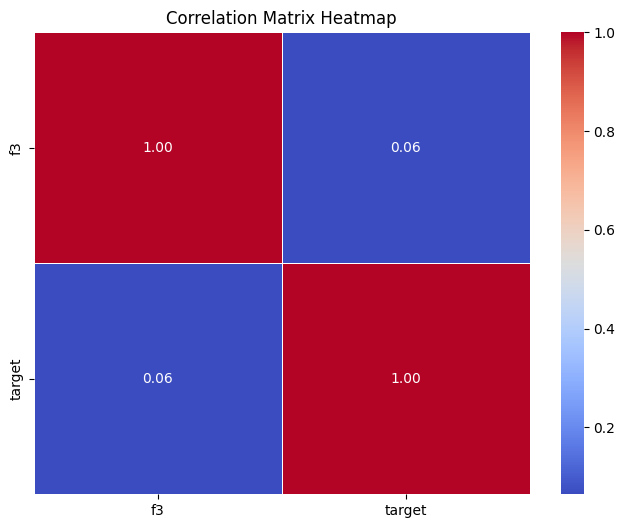

In [ ]:
'''
3. Provide at least 3 visualization graphs with a short description.
'''

# VISUALIZATION #1 - Correlation Matrix

# Calculating the correlation matrix
cor_mat = df_copy.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

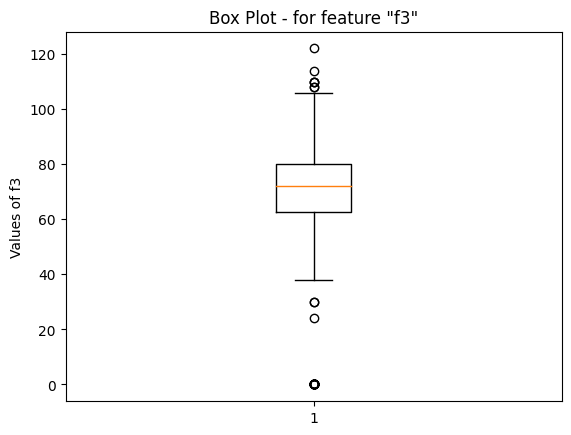

In [ ]:
# VISUALIZATION #2 - Box Plot

# Create a box plot
plt.boxplot(df_copy['f3'])
plt.title("Box Plot - for feature \"f3\"")
plt.ylabel("Values of f3")
plt.show()

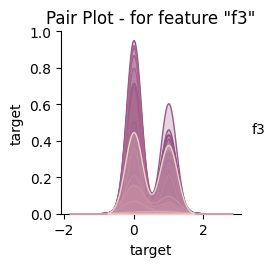

In [ ]:
# VISUALIZATION #3 - Pair plot

sns.pairplot(df_copy, hue="f3")
plt.title("Pair Plot - for feature \"f3\"")
plt.show()

<br>
<br>

### <b>Step 2: Preprocessing and Splitting the Dataset</b>


In [ ]:
'''
1. Preprocess the dataset before we use it to train the neural network.
Preprocessing typically involves converting categorical variables to numerical
variables, scaling numerical variables.

For this dataset, you can use the following preprocessing steps:
  • Convert categorical variables to numerical variables using one-hot
  encoding. You can use OneHotEncoder from scikit-learn
  • Scale numerical variables to have zero mean and unit variance. You can
  use StandardScaler from scikit-learn or Normalize from PyTorch
'''

'\n1. Preprocess the dataset before we use it to train the neural network.\nPreprocessing typically involves converting categorical variables to numerical\nvariables, scaling numerical variables.\n\nFor this dataset, you can use the following preprocessing steps:\n  • Convert categorical variables to numerical variables using one-hot\n  encoding. You can use OneHotEncoder from scikit-learn\n  • Scale numerical variables to have zero mean and unit variance. You can\n  use StandardScaler from scikit-learn or Normalize from PyTorch\n'

In [ ]:
# What we can see is that, even though all the values of every feature
# seems to be numerical, the df.info() shows that some of the features
# are holding "object" type values

# Thus, they all need to be converted to integers

for i in features_list:
  for j in range(df_copy[i].count()):
    try:
      df_copy[i][j] = df_copy[i][j].astype(float)
    except:
      continue

<ipython-input-567-666034e84261>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][j] = df_copy[i][j].astype(float)


In [ ]:
# Now that we have tried to convert every possible value into float type - we can
# now find those values which are not of float type

for i in features_list:
  # Convert non-integer values (string, characters, etc.) to NaN
  df_copy[i] = pd.to_numeric(df_copy[i], errors='coerce')

In [ ]:
# We have to replace the "NaN" values with the mean of all the values
# of the features

for i in features_list:
  df_copy[i].fillna(df_copy[i].mean(), inplace=True)

In [ ]:
# Lets have a look to the dataset

df_copy

,f1,f2,f3,f4,f5,f6,f7,target
0,6.000000,148.0,72,35.000000,0.000000,33.60000,0.627000,1
1,1.000000,85.0,66,29.000000,0.000000,26.60000,0.351000,0
2,8.000000,183.0,64,0.000000,0.000000,23.30000,0.672000,1
3,1.000000,89.0,66,23.000000,94.000000,28.10000,0.167000,0
4,0.000000,137.0,40,35.000000,168.000000,43.10000,2.288000,1
...,...,...,...,...,...,...,...,...
761,9.000000,89.0,62,0.000000,0.000000,22.50000,0.472128,0
762,10.000000,101.0,76,48.000000,180.000000,31.99817,0.171000,0
763,2.000000,122.0,70,27.000000,80.091503,36.80000,0.340000,0
764,3.849673,121.0,72,23.000000,112.000000,26.20000,0.245000,0


In [ ]:
df_copy.head(20)

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1
5,5.0,116.0,74,0.0,0.0,25.6,0.201,0
6,3.0,78.0,50,32.0,88.0,31.0,0.248,1
7,10.0,115.0,0,0.0,0.0,35.3,0.134,0
8,2.0,197.0,70,45.0,543.0,30.5,0.158,1
9,8.0,125.0,96,0.0,0.0,0.0,0.232,1


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


In [ ]:
# We can see that we have numerous ZEROES in the dataset
# Thus, we need to fix them as well. But we also need to
# make sure that the feature "target" is not hampered in any way

features_list.remove("target")

for i in features_list:
  df_copy[i] = df_copy[i].replace(0, df_copy[i].mean())

In [ ]:
# Lets check our dataset again

df_copy

,f1,f2,f3,f4,f5,f6,f7,target
0,6.000000,148.0,72.0,35.000000,80.091503,33.60000,0.627000,1
1,1.000000,85.0,66.0,29.000000,80.091503,26.60000,0.351000,0
2,8.000000,183.0,64.0,20.542484,80.091503,23.30000,0.672000,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.10000,0.167000,0
4,3.849673,137.0,40.0,35.000000,168.000000,43.10000,2.288000,1
...,...,...,...,...,...,...,...,...
761,9.000000,89.0,62.0,20.542484,80.091503,22.50000,0.472128,0
762,10.000000,101.0,76.0,48.000000,180.000000,31.99817,0.171000,0
763,2.000000,122.0,70.0,27.000000,80.091503,36.80000,0.340000,0
764,3.849673,121.0,72.0,23.000000,112.000000,26.20000,0.245000,0





f1 🔽


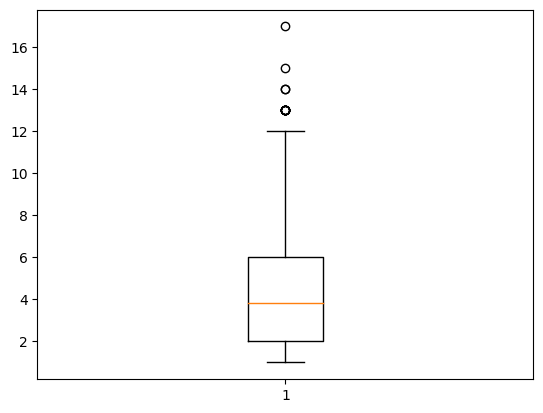




f2 🔽


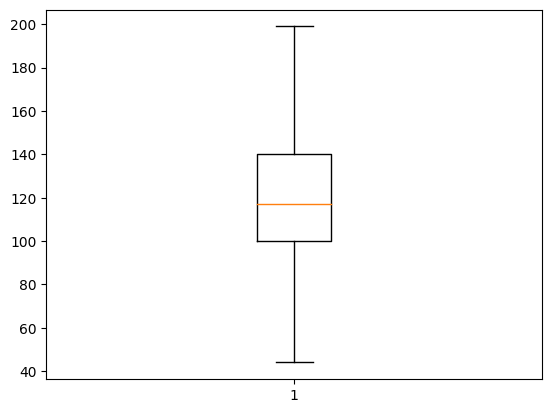




f3 🔽


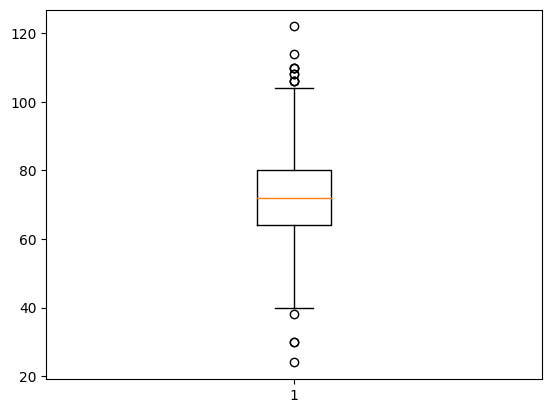




f4 🔽


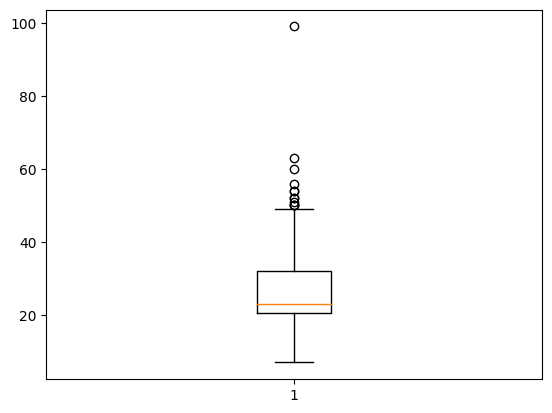




f5 🔽


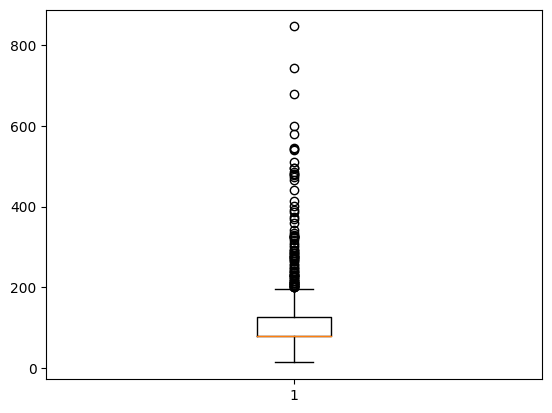




f6 🔽


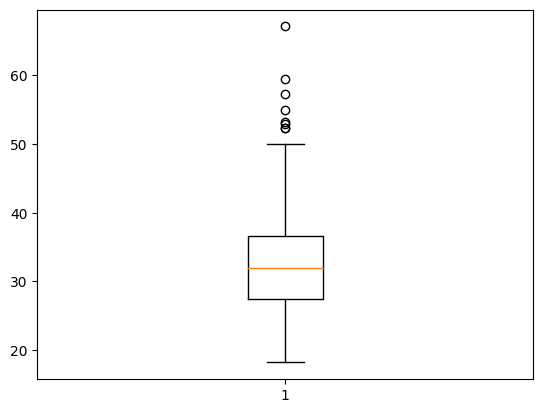




f7 🔽


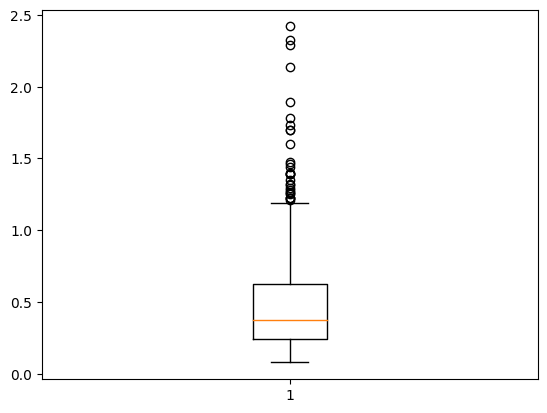

In [ ]:
# Lets use boxplots to check if the dataset has any kind of outliers in them or
# not

# Lets create boxplots

# We are taking this code from "Assignment 0 and Assignment 1"

for i in features_list:
  print("\n\n\n"+i+" 🔽")
  plt.boxplot(df_copy[i])
  plt.show()

In [ ]:
# We can see that there are outliers in most of the features
# We are going to use IQR (Inter Quartile Range) to replace them
# with "NaN"

def outliers_removal(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = []
    for i in feature:
      if (lower_bound <= i <= upper_bound):
        cleaned_data.append(i)
      else:
        cleaned_data.append('NaN')

    return cleaned_data

# Now lets put this function into action !

for i in features_list:
  df_copy[i] = outliers_removal(df_copy[i])

In [ ]:
# We also need replace those "NaN" values with the "mean" value
# of the feature

for i in features_list:
  for j in range(0, df_copy[i].count()):
    if (df_copy[i][j] == 'NaN'):
      df_copy[i][j] = np.nan

<ipython-input-577-1a0f98961473>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][j] = np.nan


In [ ]:
features_mean = []

for i in features_list:
  features_mean.append(df_copy[i].mean())

for i,j in zip(features_list, features_mean):
    df_copy[i].fillna(value = j, inplace = True)

In [ ]:
df_copy

,f1,f2,f3,f4,f5,f6,f7,target
0,6.000000,148.0,72.0,35.000000,80.091503,33.60000,0.627000,1
1,1.000000,85.0,66.0,29.000000,80.091503,26.60000,0.351000,0
2,8.000000,183.0,64.0,20.542484,80.091503,23.30000,0.672000,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.10000,0.167000,0
4,3.849673,137.0,40.0,35.000000,168.000000,43.10000,0.429980,1
...,...,...,...,...,...,...,...,...
761,9.000000,89.0,62.0,20.542484,80.091503,22.50000,0.472128,0
762,10.000000,101.0,76.0,48.000000,180.000000,31.99817,0.171000,0
763,2.000000,122.0,70.0,27.000000,80.091503,36.80000,0.340000,0
764,3.849673,121.0,72.0,23.000000,112.000000,26.20000,0.245000,0





f1 🔽


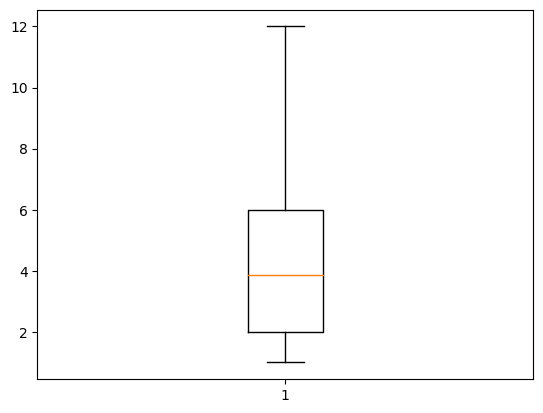




f2 🔽


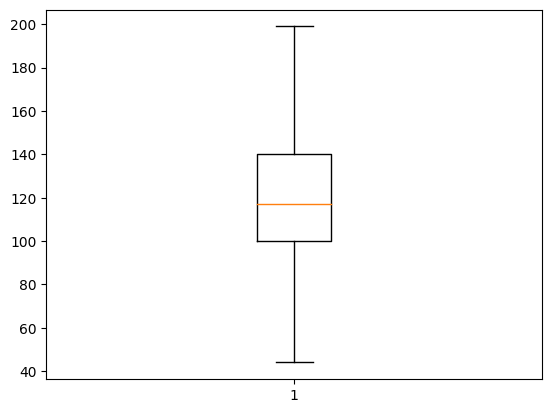




f3 🔽


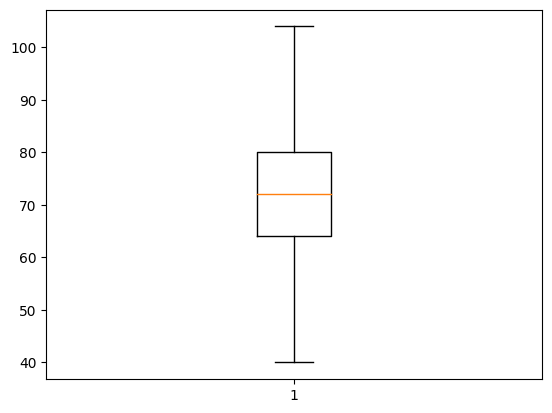




f4 🔽


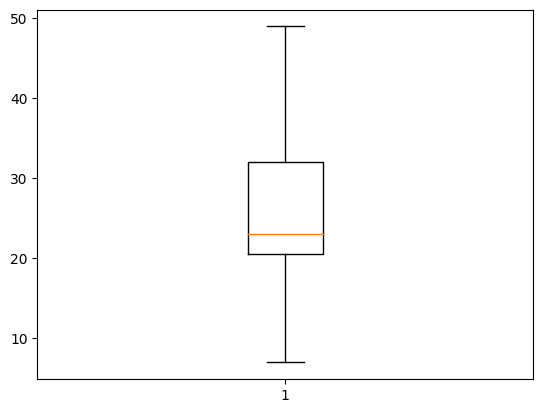




f5 🔽


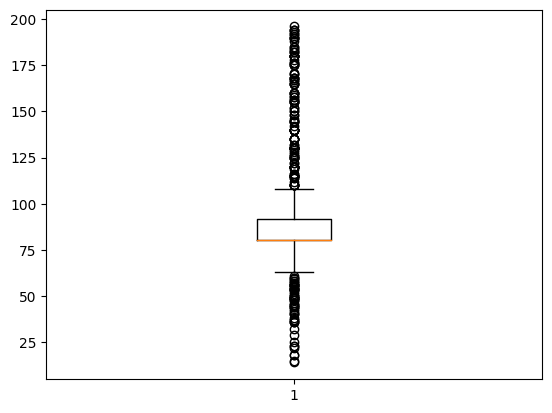




f6 🔽


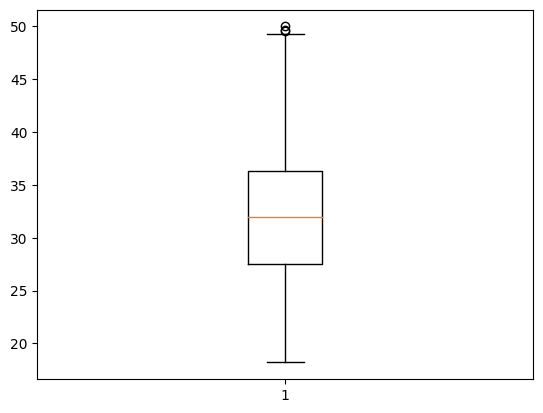




f7 🔽


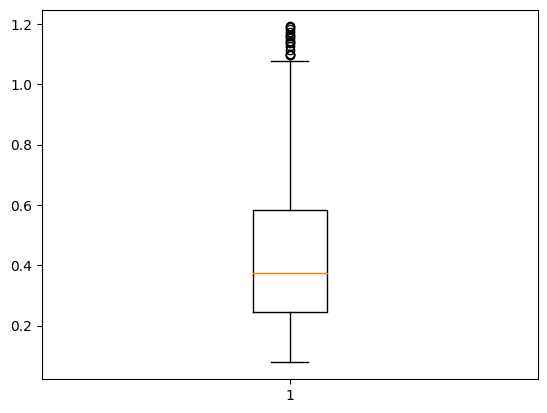

In [ ]:
# Lets use boxplots to check (AGAIN) if the dataset has any kind of outliers left
# in them or not

for i in features_list:
  print("\n\n\n"+i+" 🔽")
  plt.boxplot(df_copy[i])
  plt.show()

In [ ]:
# We can see that the features "f5 & f7" still have outliers a lot of outliers
# in them. Let us try to remove them

for i in ['f5','f7']:
  df_copy[i] = outliers_removal(df_copy[i])

for i in ['f5','f7']:
  for j in range(0, df_copy[i].count()):
    if (df_copy[i][j] == 'NaN'):
      df_copy[i][j] = np.nan

features_mean = []

for i in ['f5','f7']:
  features_mean.append(df_copy[i].mean())

for i,j in zip(['f5','f7'], features_mean):
    df_copy[i].fillna(value = j, inplace = True)

<ipython-input-581-e8cc9d68cb8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i][j] = np.nan


In [ ]:
df_copy

,f1,f2,f3,f4,f5,f6,f7,target
0,6.000000,148.0,72.0,35.000000,80.091503,33.60000,0.627000,1
1,1.000000,85.0,66.0,29.000000,80.091503,26.60000,0.351000,0
2,8.000000,183.0,64.0,20.542484,80.091503,23.30000,0.672000,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.10000,0.167000,0
4,3.849673,137.0,40.0,35.000000,82.826327,43.10000,0.429980,1
...,...,...,...,...,...,...,...,...
761,9.000000,89.0,62.0,20.542484,80.091503,22.50000,0.472128,0
762,10.000000,101.0,76.0,48.000000,82.826327,31.99817,0.171000,0
763,2.000000,122.0,70.0,27.000000,80.091503,36.80000,0.340000,0
764,3.849673,121.0,72.0,23.000000,82.826327,26.20000,0.245000,0


In [ ]:
# Now this seems to be a clean data. Let me get the statistics

df_copy.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,4.236919,121.699032,71.997550,26.110270,82.826327,32.207227,0.415716,0.349869
std,2.704951,30.383599,10.894356,8.658662,6.215144,6.417050,0.222825,0.477240
min,1.000000,44.000000,40.000000,7.000000,63.000000,18.200000,0.078000,0.000000
25%,2.000000,100.000000,64.000000,20.542484,80.091503,27.500000,0.244000,0.000000
50%,3.849673,117.000000,71.998775,23.000000,80.091503,32.000000,0.374500,0.000000
75%,6.000000,140.000000,80.000000,32.000000,82.826327,36.300000,0.556250,1.000000
max,12.000000,199.000000,104.000000,49.000000,108.000000,50.000000,1.076000,1.000000


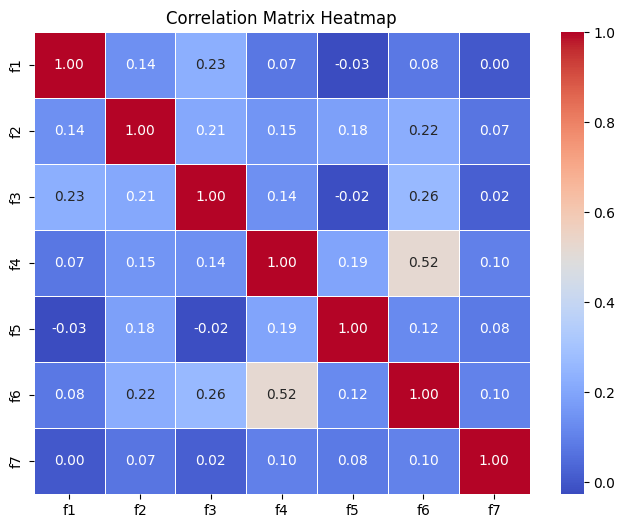

In [ ]:
# Let us provide visulaizations of selected features of the dataframe (which
# is now pre-processed)

# VISUALIZATION #1 - Correlation Matrix

# Calculating the correlation matrix
cor_mat = df_copy.drop(columns = "target", axis = 1).corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

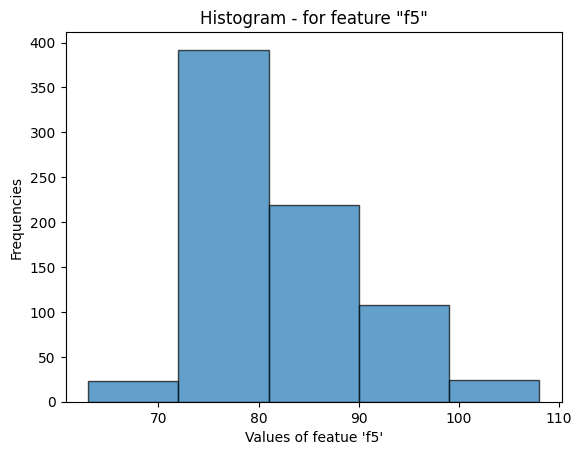

In [ ]:
# VISUALIZATION #2 - Histogram

plt.hist(df_copy['f5'], bins=5, edgecolor='black', alpha=0.7)
plt.title("Histogram - for feature \"f5\"")
plt.ylabel("Frequencies")
plt.xlabel("Values of featue 'f5'")
plt.show()

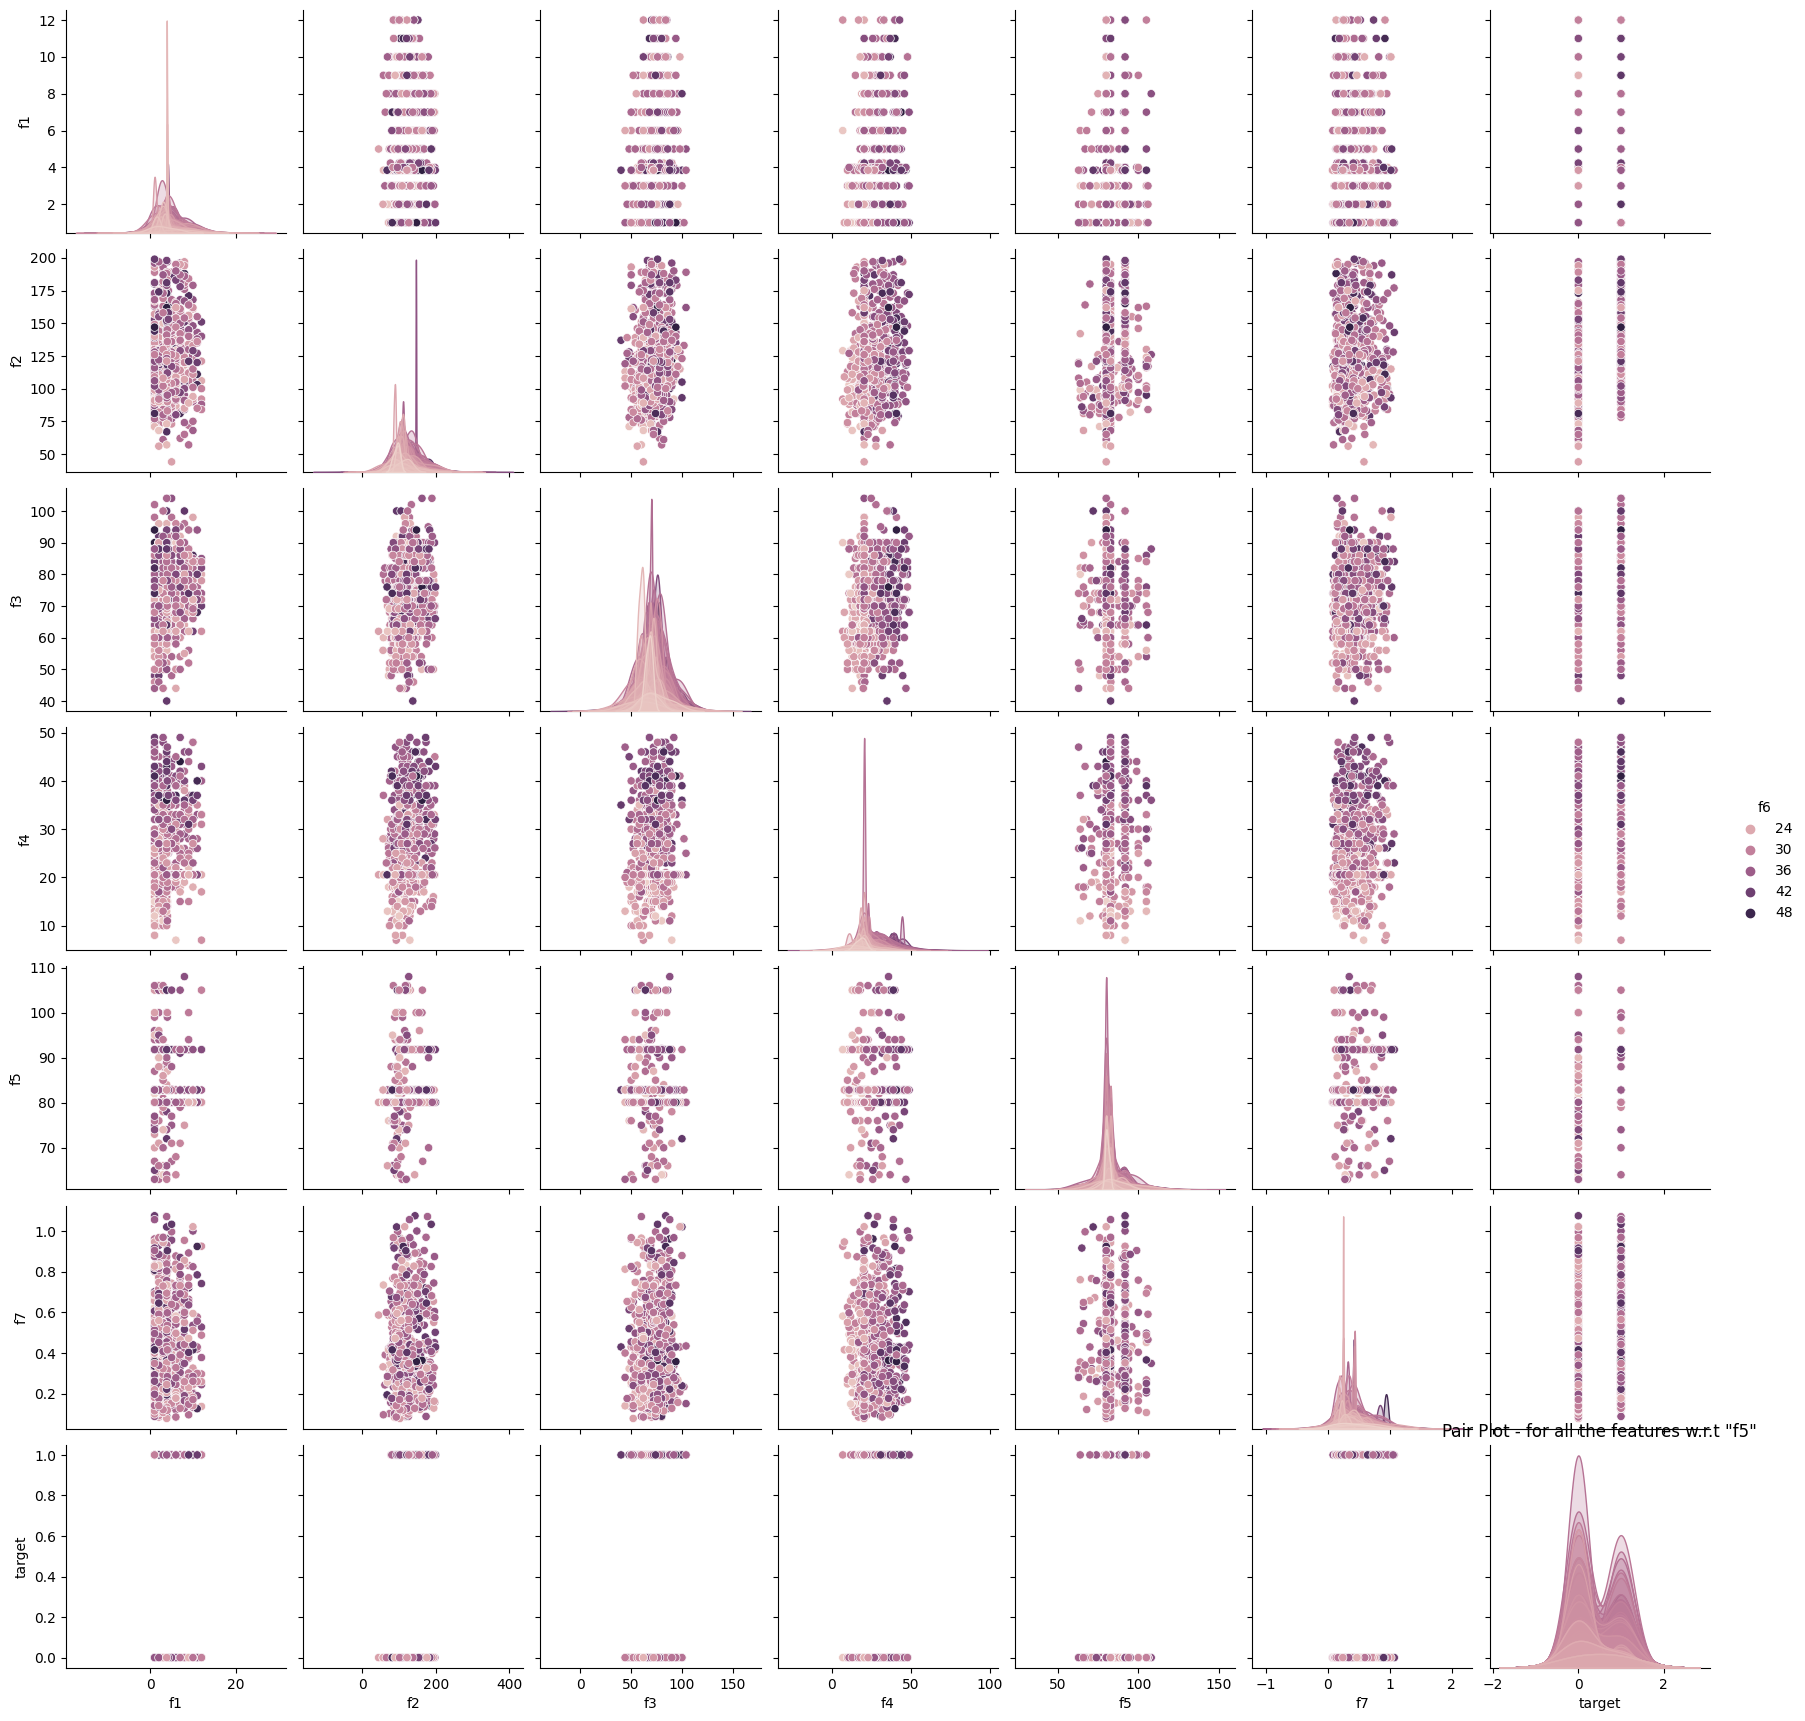

In [ ]:
# VISUALIZATION #3 - Pair plot

sns.pairplot(df_copy, hue="f6")
plt.title("Pair Plot - for all the features w.r.t \"f5\"")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

In [ ]:
# Now that we are done with removing outliers, we can now scale
# OR normalize the data

In [ ]:
# Lets scale / normalize the data

from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting and transforming the data
scaled_data = scaler.fit_transform(df_copy.drop(columns = "target", axis = 1))

# 'scaled_data' now contains the standardized data
print(scaled_data)

[[ 6.52223520e-01  8.66196018e-01  2.24989643e-04 ... -4.40313268e-01
   2.17184372e-01  9.48824966e-01]
 [-1.19744667e+00 -1.20864587e+00 -5.50878769e-01 ... -4.40313268e-01
  -8.74372232e-01 -2.90622436e-01]
 [ 1.39209159e+00  2.01888595e+00 -7.34580022e-01 ... -4.40313268e-01
  -1.38896320e+00  1.15090878e+00]
 ...
 [-8.27512630e-01  9.91206616e-03 -1.83476263e-01 ... -4.40313268e-01
   7.16181677e-01 -3.40020702e-01]
 [-1.43255554e-01 -2.30219320e-02  2.24989643e-04 ...  5.94875404e-14
  -9.36746895e-01 -7.66642091e-01]
 [-1.19744667e+00  1.41648059e-01 -1.10198253e+00 ... -4.40313268e-01
  -3.28593930e-01 -2.99603939e-01]]


In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=df_copy.columns.tolist().remove("target"))

In [ ]:
scaled_df = pd.concat([scaled_df, df_copy["target"]], axis = 1)

In [ ]:
# Because we need to deal with a pandas dataframe - thus, we have to convert
# accordingly

scaled_df

,0,1,2,3,4,5,6,target
0,0.652224,0.866196,0.000225,1.027357,-4.403133e-01,0.217184,0.948825,1
1,-1.197447,-1.208646,-0.550879,0.333957,-4.403133e-01,-0.874372,-0.290622,0
2,1.392092,2.018886,-0.734580,-0.643451,-4.403133e-01,-1.388963,1.150909,1
3,-1.197447,-1.076910,-0.550879,-0.359444,1.798989e+00,-0.640467,-1.116921,0
4,-0.143256,0.503922,-2.938995,1.027357,5.948754e-14,1.698583,0.064056,1
...,...,...,...,...,...,...,...,...
761,1.762026,-1.076910,-0.918281,-0.643451,-4.403133e-01,-1.513713,0.253334,0
762,2.131960,-0.681702,0.367627,2.529725,5.948754e-14,-0.032600,-1.098958,0
763,-0.827513,0.009912,-0.183476,0.102823,-4.403133e-01,0.716182,-0.340021,0
764,-0.143256,-0.023022,0.000225,-0.359444,5.948754e-14,-0.936747,-0.766642,0


In [ ]:
# Creating a dictionary for assigning / renaming column names

keys = scaled_df.columns.tolist()
values = df_copy.columns.tolist()

feature_dict = {keys[i]: values[i] for i in range(len(keys))}

scaled_df = scaled_df.rename(columns=feature_dict)

In [ ]:
# Assigning column names to the appropriate column

scaled_df

,f1,f2,f3,f4,f5,f6,f7,target
0,0.652224,0.866196,0.000225,1.027357,-4.403133e-01,0.217184,0.948825,1
1,-1.197447,-1.208646,-0.550879,0.333957,-4.403133e-01,-0.874372,-0.290622,0
2,1.392092,2.018886,-0.734580,-0.643451,-4.403133e-01,-1.388963,1.150909,1
3,-1.197447,-1.076910,-0.550879,-0.359444,1.798989e+00,-0.640467,-1.116921,0
4,-0.143256,0.503922,-2.938995,1.027357,5.948754e-14,1.698583,0.064056,1
...,...,...,...,...,...,...,...,...
761,1.762026,-1.076910,-0.918281,-0.643451,-4.403133e-01,-1.513713,0.253334,0
762,2.131960,-0.681702,0.367627,2.529725,5.948754e-14,-0.032600,-1.098958,0
763,-0.827513,0.009912,-0.183476,0.102823,-4.403133e-01,0.716182,-0.340021,0
764,-0.143256,-0.023022,0.000225,-0.359444,5.948754e-14,-0.936747,-0.766642,0


In [ ]:
'''
2. Split the dataset into training, testing and validation sets
'''

# Data will be splitted in 80:10:10 (train:validation:test) ratio

# Here, the constraint is that, I have to create validation dataset
# using training dataset only

from sklearn.model_selection import train_test_split

# We have to remove the "target" feature from the dataset to create X
# (the input data) and feed that to y (the output / target data)

X = scaled_df.drop("target", axis=1)
y = scaled_df["target"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Now we will use X_temp and y_temp to create Validation and Training
# dataset

X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.111, random_state=42)

In [ ]:
# Now let us just see the components we have just created

X_train

,f1,f2,f3,f4,f5,f6,f7
745,2.871828,-0.714636,1.102433e+00,7.962236e-01,3.570016e+00,-0.344188,0.324611
132,-0.457579,1.590744,-7.345800e-01,1.258491e+00,1.443958e+00,0.357527,-0.268169
661,-1.197447,2.545830,3.676275e-01,1.951891e+00,-4.403133e-01,1.667395,0.064056
621,-0.827513,-0.978108,3.676275e-01,-7.061440e-01,-4.403133e-01,-1.248620,0.064056
699,-0.087645,-0.121824,-1.834763e-01,-6.434510e-01,-4.403133e-01,1.916894,2.192763
...,...,...,...,...,...,...,...
532,-1.197447,-1.175712,-5.508788e-01,-4.926907e-15,-2.870082e+00,1.417897,2.251143
136,-0.143256,-0.714636,-1.834763e-01,-1.274358e-02,5.948754e-14,-0.219438,0.814102
278,0.282289,-0.253560,1.839262e-01,-6.434510e-01,-4.403133e-01,-1.139465,1.474243
503,1.022158,-0.912240,-7.345800e-01,-1.283103e-01,-6.160480e-01,0.170403,1.447298


In [ ]:
y_train

745    0
132    1
661    1
621    0
699    0
      ..
532    0
136    0
278    0
503    0
597    0
Name: target, Length: 612, dtype: int64

In [ ]:
X_test

,f1,f2,f3,f4,f5,f6,f7
428,-0.143256,0.438054,2.020939e+00,2.298591e+00,5.948754e-14,1.308741e+00,-0.591503
659,-0.457579,-1.373316,9.187313e-01,5.650901e-01,-2.065070e+00,3.107464e-01,0.064056
350,-0.087645,-0.978108,7.350300e-01,-6.434510e-01,-4.403133e-01,1.558240e+00,-0.802568
571,-0.827513,0.273384,2.204640e+00,-6.434510e-01,-4.403133e-01,-1.498119e+00,-0.663355
336,-0.143256,-0.154758,-2.644151e-01,-6.434510e-01,-4.403133e-01,2.483717e-01,2.318504
...,...,...,...,...,...,...,...
756,1.022158,0.503922,1.653536e+00,1.720758e+00,-4.403133e-01,-3.231428e-02,-0.110992
662,1.392092,1.491942,-2.610552e-15,2.298591e+00,1.443958e+00,8.409310e-01,-1.125902
10,-0.087645,-0.385296,1.837238e+00,-6.434510e-01,-4.403133e-01,8.409310e-01,-1.009143
521,-0.457579,0.075780,7.350300e-01,7.962236e-01,5.948754e-14,1.548097e-01,-0.497197


In [ ]:
y_test

428    0
659    1
350    0
571    0
336    0
      ..
756    0
662    1
10     0
521    0
445    1
Name: target, Length: 77, dtype: int64

In [ ]:
X_validation

,f1,f2,f3,f4,f5,f6,f7
544,-1.197447,-1.109844,0.551329,0.333957,-1.099055e+00,-0.032314,-0.227752
58,-0.143256,0.800328,0.918731,-0.643451,-4.403133e-01,1.293147,0.064056
236,1.022158,1.953018,1.102433,-0.590577,5.948754e-14,0.575839,0.764704
12,2.131960,0.569790,0.735030,-0.643451,-4.403133e-01,-0.796404,0.064056
433,-0.827513,0.569790,0.275777,-0.643451,-4.403133e-01,-1.030309,-1.116921
...,...,...,...,...,...,...,...
119,-0.087645,-0.747570,0.367627,-1.283978,5.948754e-14,-1.404557,-0.865439
311,-0.143256,-0.517032,-0.183476,1.258491,5.948754e-14,1.121617,0.850028
641,-0.087645,0.207516,-0.183476,-0.643451,-4.403133e-01,0.326340,-0.506179
71,0.282289,0.569790,-0.734580,1.027357,5.948754e-14,-0.562499,-0.021177


In [ ]:
y_validation

544    0
58     0
236    1
12     0
433    0
      ..
119    0
311    0
641    0
71     0
764    0
Name: target, Length: 77, dtype: int64

<br>
<br>

### <b>Step 3: Defining the Neural Network</b>

Now, we need to define the neural network that we will use to make predictions on the dataset. For this part, you can define a simple neural network.<br>
    1. Decide your NN architecture:<br>
    • How many input neurons are there?<br>
    • How many output neurons are there?<br>
    • What activation function is used for the hidden layers? <br>
    o Suggestion: try ReLU, ELU, Sigmoid, click here for the full list<br>
    • What activation function is used for the output layer? <br>
    • What is the number of hidden layers?<br>
    o Suggestion: start with a small network, e.g., 2 or 3 hidden layers<br>
    • What is the size of each hidden layer? <br>
    o Suggestion: try 64 or 128 nodes for each layer <br>
    • Do you include Dropout? (details) <br>
<br>2. Define your NN architecture using PyTorch (basic building blocks in PyTorch).<br>
<br>3. Return the summary of your model. You can use Torchinfo package

In [ ]:
!pip install torchinfo

In [ ]:
import torch
import torch.nn as nn
import torchinfo

# Step 1: Define your NN architecture
input_size = 7  # Number of input features
output_size = 1  # Number of output neurons (binary classification)
hidden_size = [128, 64, 32]  # Number of nodes in each hidden layer
activation_hidden = nn.ReLU()  # Activation function for hidden layers
activation_output = nn.Sigmoid()  # Activation function for the output layer
num_hidden_layers = len(hidden_size) # Obtaining the number of hidden layers

# Set to dropout variable to "True" to include dropout
use_dropout = True

# Step 2: Defining the NN architecture using PyTorch
class SelfNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout):
        super(SelfNN, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.num_hidden_layers = num_hidden_layers

        # Input layer
        self.hidden_layers.append(nn.Linear(input_size, hidden_size[0]))
        if use_dropout:
            self.hidden_layers.append(nn.Dropout(0.2))

        # Hidden layers
        for i in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size[i], hidden_size[i + 1]))
            if use_dropout:
                self.hidden_layers.append(nn.Dropout(0.2))
            self.hidden_layers.append(activation_hidden)

        # Output layer
        self.output_layer = nn.Linear(hidden_size[-1], output_size)
        self.output_activation = activation_output

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        x = self.output_activation(x)
        return x

# Creating an instance of the model
model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Step 3: Returning the summary of the model created using Torchinfo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
summary = torchinfo.summary(model, input_size=(1, input_size), device=device)

# Displaying the model summary
print(summary)

Layer (type:depth-idx)                   Output Shape              Param #
SelfNN                                   [1, 1]                    --
├─ModuleList: 1-1                        --                        --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─Dropout: 2-2                      [1, 128]                  --
│    └─Linear: 2-3                       [1, 64]                   8,256
│    └─Dropout: 2-4                      [1, 64]                   --
│    └─ReLU: 2-5                         [1, 64]                   --
│    └─Linear: 2-6                       [1, 32]                   2,080
│    └─Dropout: 2-7                      [1, 32]                   --
│    └─ReLU: 2-8                         [1, 32]                   --
├─Linear: 1-2                            [1, 1]                    33
├─Sigmoid: 1-3                           [1, 1]                    --
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
Total 

<br>
<br>

### <b>Step 4: Training the Neural Network</b>

1. Set up the training loop. In this step, you will create a loop that iterates over the training data for a specified number of epochs.<br>
    • For each epoch, you will iterate over the batches of the training data, compute the forward pass through the neural network, compute the loss, compute the gradients using backpropagation, and update the weights of the network using an optimizer such as Stochastic Gradient Descent (SGD) or Adam. <br>
    • After getting the training loss, set the validation as zero and the model to evaluation model. Disable the gradient computation, start a loop and iterate it over batches of the validation set. Compute the forward pass and the loss. There will be no backward propagation to calculate the gradients and no optimizer step to update the steps. <br>

2. Define the loss function that will be used to compute the error between the
predicted output of the neural network and the true labels of the training data.

3. Choose an optimizer and a learning rate. It will update the weights of the neural network during training. Stochastic Gradient Descent (SGD) is one of the commonly used, you can also explore other optimizers like Adam or RMSProp. Check a list of optimizers (PyTorch)

4. Train the neural network. Run the training loop and train the neural network on the training data. Select the number of epochs and batch size. Monitor the training loss and the validation loss at each epoch to ensure that the model is not overfitting to the training data.

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Defining the loss function
# Here we are choosing : Binary Cross-Entropy Loss
criterion = nn.BCELoss()

# Setting the required hyperparameters
num_epochs = 20
batch_size = 64
learning_rate = 0.001

# Converting the DataFrame data to NumPy arrays
X_train_numpy = X_train.values
y_train_numpy = y_train.values
X_validation_numpy = X_validation.values
y_validation_numpy = y_validation.values

# Converting NumPy arrays to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_numpy)
y_train_tensor = torch.Tensor(y_train_numpy)
X_validation_tensor = torch.Tensor(X_validation_numpy)
y_validation_tensor = torch.Tensor(y_validation_numpy)

# Creating DataLoader instances for the training and validation data
batch_size = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle = False)

# Creating instance of the neural network
model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Create an instance an optimizer
# Here, we are taking the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_accuracy_list = []
train_loss_list = []
validation_accuracy_list = []
validation_loss_list = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0

    # Iterating over batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        # Ensuring that labels have the same shape as the model's output
        labels = labels.view(-1, 1)

        # Computing the loss
        loss = criterion(outputs, labels)

        # Applying backpropagation
        loss.backward()

        # Updating the weights
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list.append(training_accuracy)
    train_loss_list.append(training_loss)

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Validation loop
    model.eval()
    correct_valid = 0
    total_valid = 0
    running_val_loss = 0.0

    # We won't be needing to compute gradient for validation
    with torch.no_grad():
        for inputs, labels in valid_loader:
            val_outputs = model(inputs)
            validation_predictions = (val_outputs > 0.5).squeeze()
            correct_valid += (validation_predictions == labels).sum().item()
            total_valid += labels.size(0)

            # Ensure that labels have the same shape as the model's output
            labels = labels.view(-1, 1)

            val_loss = criterion(val_outputs, labels)
            running_val_loss += val_loss.item()


    valid_accuracy = correct_valid / total_valid
    valid_loss = running_loss / len(valid_loader)

    validation_accuracy_list.append(valid_accuracy)
    validation_loss_list.append(valid_loss)

    validation_loss = running_val_loss / len(valid_loader)
    print(f"Epoch {epoch + 1}, Validation Loss: {validation_loss:.4f}")

print("Training finished")

Epoch 1, Training Loss: 0.7998
Epoch 1, Validation Loss: 0.6474
Epoch 2, Training Loss: 0.7692
Epoch 2, Validation Loss: 0.5535
Epoch 3, Training Loss: 0.7238
Epoch 3, Validation Loss: 0.4813
Epoch 4, Training Loss: 0.6905
Epoch 4, Validation Loss: 0.4981
Epoch 5, Training Loss: 0.6763
Epoch 5, Validation Loss: 0.5607
Epoch 6, Training Loss: 0.6734
Epoch 6, Validation Loss: 0.6058
Epoch 7, Training Loss: 0.6708
Epoch 7, Validation Loss: 0.6470
Epoch 8, Training Loss: 0.6668
Epoch 8, Validation Loss: 0.6769
Epoch 9, Training Loss: 0.6615
Epoch 9, Validation Loss: 0.7085
Epoch 10, Training Loss: 0.6614
Epoch 10, Validation Loss: 0.7450
Epoch 11, Training Loss: 0.6624
Epoch 11, Validation Loss: 0.7917
Epoch 12, Training Loss: 0.6601
Epoch 12, Validation Loss: 0.8444
Epoch 13, Training Loss: 0.6594
Epoch 13, Validation Loss: 0.9266
Epoch 14, Training Loss: 0.6587
Epoch 14, Validation Loss: 0.9935
Epoch 15, Training Loss: 0.6588
Epoch 15, Validation Loss: 1.0494
Epoch 16, Training Loss: 0.6

In [ ]:
# Defining the loss function
criterion = nn.BCELoss()

# Setting hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Converting DataFrame data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()
X_test_tensor = torch.Tensor(X_test.values).float()

# Ensuring that the test labels have the same shape as the model's output
y_test_tensor = torch.Tensor(y_test.values).float()
y_test_tensor = y_test_tensor.view(-1, 1)

# Creating "DataLoader" instances for the training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Creating an instance of the neural network
model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Creating an optimizer (Here, we are taking "Adam" optimizer)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

test_accuracy_list = []
test_loss_list = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Iterating over batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Ensuring that labels have the same shape as the model's output
        labels = labels.view(-1, 1)

        # Lets compute the loss
        loss = criterion(outputs, labels)

        # Doing backpropagation
        loss.backward()

        # Updating the weights
        optimizer.step()
        running_loss += loss.item()

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}")

    test_accuracy_list.append(testing_accuracy)
    test_loss_list.append(test_loss)

print("Training & Testing finished")

Epoch 1, Training Loss: 0.6466
Epoch 1, Testing Loss: 0.6340
Epoch 2, Training Loss: 0.5799
Epoch 2, Testing Loss: 0.5917
Epoch 3, Training Loss: 0.5175
Epoch 3, Testing Loss: 0.5621
Epoch 4, Training Loss: 0.4857
Epoch 4, Testing Loss: 0.5425
Epoch 5, Training Loss: 0.4682
Epoch 5, Testing Loss: 0.5391
Epoch 6, Training Loss: 0.4648
Epoch 6, Testing Loss: 0.5324
Epoch 7, Training Loss: 0.4723
Epoch 7, Testing Loss: 0.5304
Epoch 8, Training Loss: 0.4606
Epoch 8, Testing Loss: 0.5328
Epoch 9, Training Loss: 0.4685
Epoch 9, Testing Loss: 0.5395
Epoch 10, Training Loss: 0.4600
Epoch 10, Testing Loss: 0.5377
Training & Testing finished


<br>
<br>

5. Evaluate the performance of the model on the testing data. Suggested metrics:<br>
• Time to train (e.g. using time.time())<br>
• Accuracy (PyTorch functions)<br>
• Precision, recall and F1 score (more details). You can use sklearn.metrics.precision_recall_fscore_support
<br><br>
Note: The expected accuracy on the testing dataset for this task is > 75%

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
X_test = torch.Tensor(X_test.values)
y_test = torch.Tensor(y_test.values)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Evaluation mode "ON"
model.eval()

# Stroing the predictions
test_preds = []

# Storing the true values
test_labels = []

# We need to record the start time
start_time = time.time()

with torch.no_grad():
    for inputs, labels in test_loader:
        # Ensuring the inputs and labels are on the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        test_preds.extend(outputs.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

end_time = time.time()  # Record end time

# Calculating the time it took to train
training_time = end_time - start_time

# Converting predictions and labels to NumPy arrays
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)

# Calculating the accuracy
accuracy = accuracy_score(test_labels, (test_preds > 0.5).astype(int))

# Calculating precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, (test_preds > 0.5).astype(int), average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Time to Train (seconds): {training_time:.2f}")

Accuracy: 0.7532
Precision: 0.7000
Recall: 0.6774
F1 Score: 0.6885
Time to Train (seconds): 0.01


<br>
<br>

6. Save the weights of the trained neural network. Saving and loading models in PyTorch

In [ ]:
import h5py
torch.save(model.state_dict(), "part_1_OLD_MODEL.pth")
with h5py.File("part_1_OLD_MODEL.h5", "w") as hf:
  {k: v.cpu().numpy() for k, v in torch.load("part_1_OLD_MODEL.pth").items()}
  hf.close()

!cp part_1_OLD_MODEL.h5 "drive/My Drive/"

<br>
<br>

7. Visualize the results. Include the following graphs:<br>
a. Confusion matrices (seaborn.heatmap() or PyTorch)<br>
b. ROC curve (receiver operating characteristic curve).<br>
• Details about ROC<br>
• PyTorch ROC funnction<br>
c. A graph that compares test, validation and training accuracy on the same plot with a clear labeling<br>
d. A graph that compares test, validation and training loss on the same plot with a clear labeling

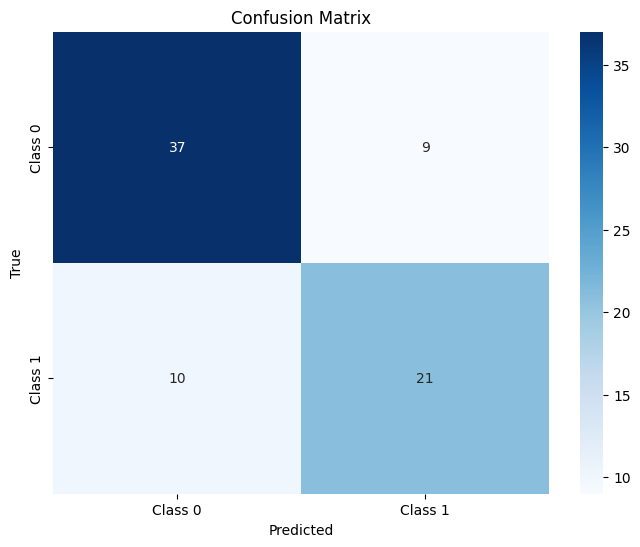

In [ ]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting the confusion matrix for the test data (y_test)
test_predictions = (model(X_test) > 0.5).squeeze().detach().numpy()
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, test_predictions, labels)

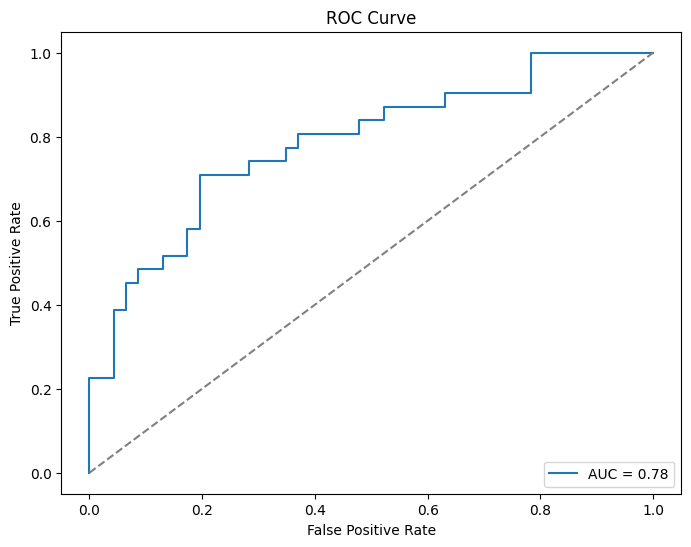

In [ ]:
# ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Calculating ROC curve for the test data
test_scores = model(X_test).squeeze().detach().numpy()
plot_roc_curve(y_test, test_scores)

In [ ]:
def ZeroOneScaling(list_of_values):
    # Finding the minimum and maximum values in the list
    min_val = min(list_of_values)
    max_val = max(list_of_values)

    # Scaling each value between 0 and 1
    scaled_values = [(val - min_val) / (max_val - min_val) for val in list_of_values]

    return scaled_values

test_accuracy_list_scaled = ZeroOneScaling(test_accuracy_list)

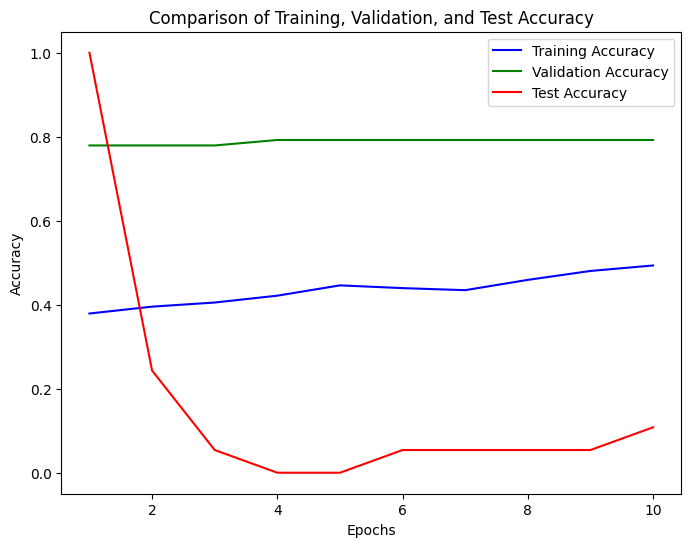

In [ ]:
# Accuracy Comparison Plot

epochs = range(1, len(train_accuracy_list[10:20]) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy_list[10:20], 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy_list[10:20], 'g', label='Validation Accuracy')
plt.plot(epochs, test_accuracy_list_scaled, 'r', label='Test Accuracy')
plt.title('Comparison of Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

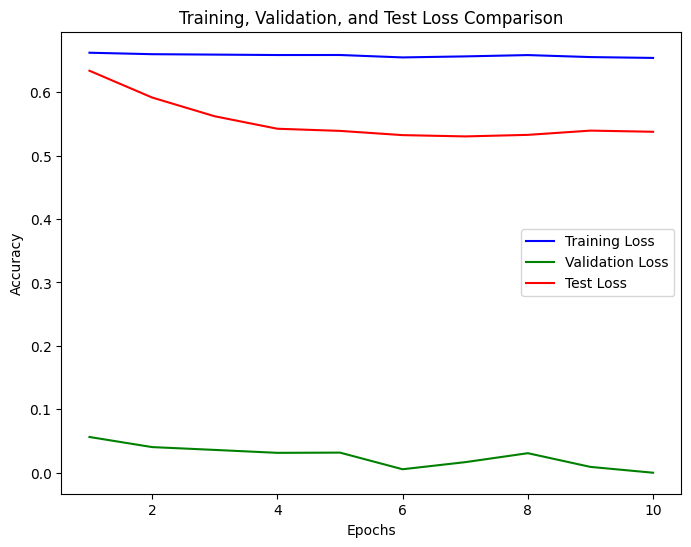

In [ ]:
# Loss Comparison Plot

validation_loss_list_scaled = ZeroOneScaling(validation_loss_list)

epochs = range(1, len(train_loss_list[10:20]) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list[10:20], 'b', label='Training Loss')
plt.plot(epochs, validation_loss_list_scaled[10:20], 'g', label='Validation Loss')
plt.plot(epochs, test_loss_list, 'r', label='Test Loss')
plt.title('Training, Validation, and Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<br>
<br>

# <b>PART II : Optimizing NN</b>

Based on your NN model defined in Part I, tune the hyperparameters and apply different
tools to increase accuracy. Try various setups and draw conclusions.

# <b>STEPS :</b>

1. Choose one hyperparameter to modify (e.g., Dropout). Fix the NN structure and
all other parameters based on the model defined in Part I and change values only for your chosen hyperparameter.<br>
• Provide the results in the form of a table below.<br>
• Save the model and the weights.<br>
• Visualize the results. Provide the graphs mentioned in Part I step 7.


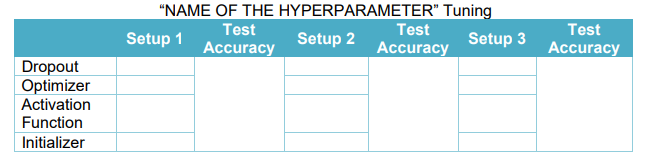

DROPOUT RATES 🔽

In [ ]:
# Defining a list of different hyperparameter values to tune
dropout_rates = [0.4, 0.6, 0.8]

In [ ]:
# Creating dictionary to store the results
results = {}

In [ ]:
train_accuracy_list_1 = []
validation_accuracy_list_1 = []
test_accuracy_list_1 = []
train_loss_list_1 = []
validation_loss_list_1 = []
test_loss_list_1 = []

num_epochs = 10

# Looping through different dropout rates and recording test accuracy
for dropout_rate in dropout_rates:
  # Define your model with the modified dropout rate
    model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout=True)

    # Creating an optimizer (Adam)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
      model.train()
      correct_train = 0
      total_train = 0
      running_loss = 0.0

      # Iterating over batches of training data
      for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_1.append(training_accuracy)
    train_loss_list_1.append(training_loss)

    training_loss = running_loss / len(train_loader)

    # Validation loop
    model.eval()
    correct_valid = 0
    total_valid = 0
    running_val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            val_outputs = model(inputs)
            validation_predictions = (val_outputs > 0.5).squeeze()
            correct_valid += (validation_predictions == labels).sum().item()
            total_valid += labels.size(0)

            labels = labels.view(-1, 1)

            val_loss = criterion(val_outputs, labels)
            running_val_loss += val_loss.item()


    valid_accuracy = correct_valid / total_valid
    valid_loss = running_loss / len(valid_loader)

    validation_accuracy_list_1.append(valid_accuracy)
    validation_loss_list_1.append(valid_loss)

    validation_loss = running_val_loss / len(valid_loader)

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            labels = labels.view(-1, 1)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)

    test_accuracy_list_1.append(testing_accuracy)
    test_loss_list_1.append(test_loss)

    # Storing Test Accuracy in the results dictionary
    results[f'Dropout {dropout_rate}'] = testing_accuracy

    # Saving the trained and tested model's weights
    torch.save(model.state_dict(), "part_2_Dropout_{dropout_rate}.pth")
    state_dict = torch.load("part_2_Dropout_{dropout_rate}.pth")
    numpy_state_dict = {k: v.cpu().numpy() for k, v in state_dict.items()}
    with h5py.File("part_2_Dropout_{dropout_rate}.h5", "w") as hf:
      for k, v in numpy_state_dict.items():
        hf.create_dataset(k, data=v)

    !cp "part_2_Dropout_{dropout_rate}.h5" "drive/My Drive/"

# Print the results in a table
print("Hyperparameter Tuning Results:")
print("{} {}".format("Dropout Rate", "Test Accuracy"))
for dropout_rate, test_accuracy in results.items():
    print("{} {:.6f}".format(dropout_rate, test_accuracy))

Hyperparameter Tuning Results:
Dropout Rate Test Accuracy
Dropout 0.4 0.701299
Dropout 0.6 0.740260
Dropout 0.8 0.727273


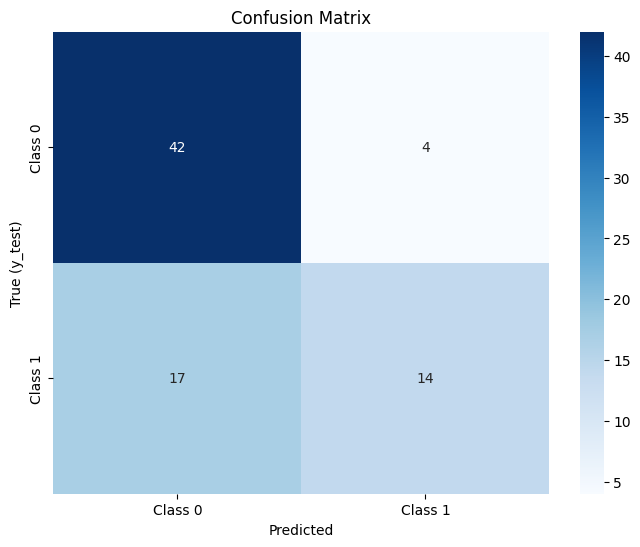

In [ ]:
# Let us try to visualize the results for what we just obtained

# CONFUSION MATRIX

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True (y_test)')
    plt.title('Confusion Matrix')
    plt.show()

test_predictions = (model(X_test) > 0.5).squeeze().detach().numpy()
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, test_predictions, labels)

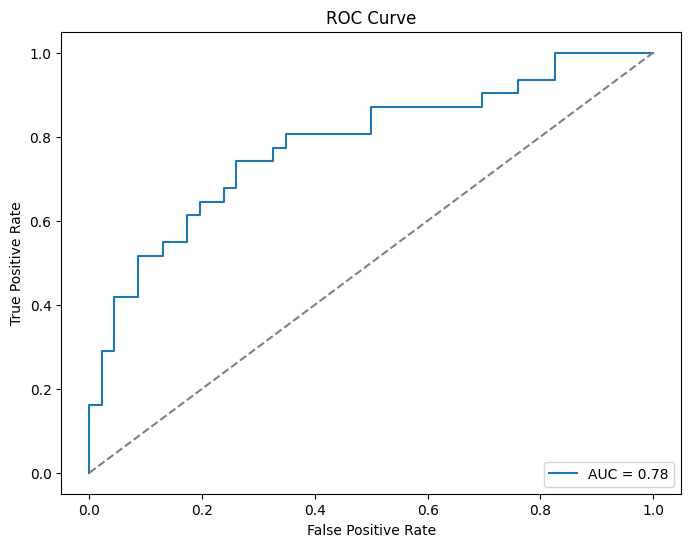

In [ ]:
# ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

test_scores = model(X_test).squeeze().detach().numpy()
plot_roc_curve(y_test, test_scores)

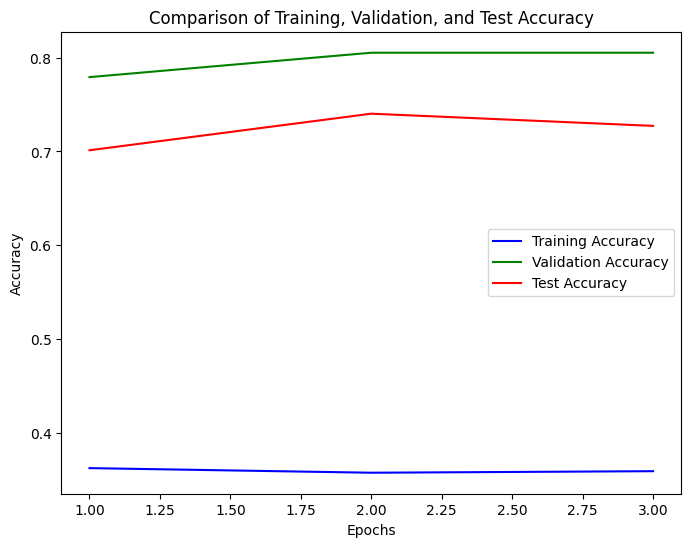

In [ ]:
# Accuracy Comparison Plot

import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy_list_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy_list_1, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy_list_1, 'g', label='Validation Accuracy')
plt.plot(epochs, test_accuracy_list_1, 'r', label='Test Accuracy')
plt.title('Comparison of Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

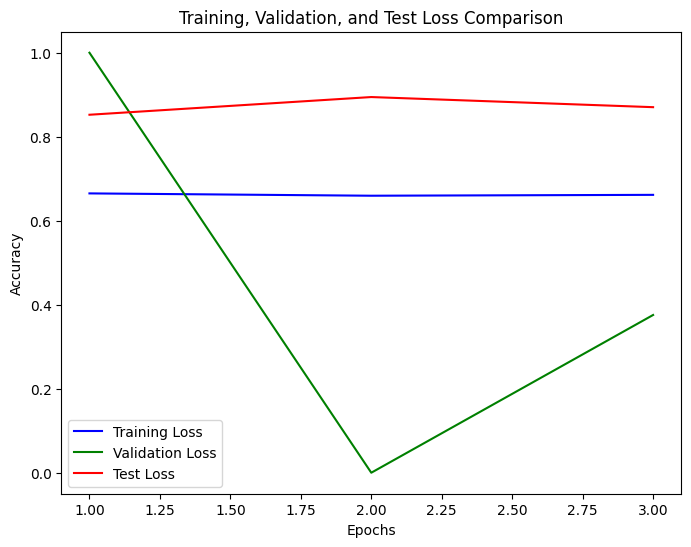

In [ ]:
# Loss Comparison Plot
validation_loss_list_1_scaled = ZeroOneScaling(validation_loss_list_1)

epochs = range(1, len(train_loss_list_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list_1, 'b', label='Training Loss')
plt.plot(epochs, validation_loss_list_1_scaled, 'g', label='Validation Loss')
plt.plot(epochs, test_loss_list_1, 'r', label='Test Loss')
plt.title('Training, Validation, and Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<br>
<br>

2. Choose another hyperparameter and go to step 1. Do the same procedure for
three hyperparameters. You can extend the list of hyperparameters, if needed.

OPTIMIZERS 🔽

In [ ]:
train_accuracy_list_2 = []
validation_accuracy_list_2 = []
test_accuracy_list_2 = []
train_loss_list_2 = []
validation_loss_list_2 = []
test_loss_list_2 = []

results ={}

num_epochs = 10

# Defining the list of optimizers to tune with
optimizers = [optim.SGD, optim.Adam, optim.RMSprop]

dropout_rate = 0.2

# Looping through different optimizers rates and record test accuracy
for optimizer_class in optimizers:
    model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout=True)

    optimizer = optimizer_class(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
      model.train()
      correct_train = 0
      total_train = 0
      running_loss = 0.0

      for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_2.append(training_accuracy)
    train_loss_list_2.append(training_loss)

    training_loss = running_loss / len(train_loader)

    # Validation loop
    model.eval()
    correct_valid = 0
    total_valid = 0
    running_val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            val_outputs = model(inputs)
            validation_predictions = (val_outputs > 0.5).squeeze()
            correct_valid += (validation_predictions == labels).sum().item()
            total_valid += labels.size(0)

            labels = labels.view(-1, 1)

            val_loss = criterion(val_outputs, labels)
            running_val_loss += val_loss.item()


    valid_accuracy = correct_valid / total_valid
    valid_loss = running_loss / len(valid_loader)

    validation_accuracy_list_2.append(valid_accuracy)
    validation_loss_list_2.append(valid_loss)

    validation_loss = running_val_loss / len(valid_loader)

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            labels = labels.view(-1, 1)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)

    test_accuracy_list_2.append(testing_accuracy)
    test_loss_list_2.append(test_loss)

    results[f'Dropout {dropout_rate}, Optimizer {optimizer_class.__name__}'] = testing_accuracy

    # Save the trained and tested model
    torch.save(model.state_dict(), "part_2_Optimizer_{optimizer_class.__name__}.pth")
    state_dict = torch.load("part_2_Optimizer_{optimizer_class.__name__}.pth")
    numpy_state_dict = {k: v.cpu().numpy() for k, v in state_dict.items()}
    with h5py.File("part_2_Optimizer_{optimizer_class.__name__}.h5", "w") as hf:
      for k, v in numpy_state_dict.items():
        hf.create_dataset(k, data=v)

    !cp "part_2_Optimizer_{optimizer_class.__name__}.h5" "drive/My Drive/"

# Printing the result
print("Hyperparameter Tuning Results:")
print("{} {}".format("Hyperparameters", "Test Accuracy"))
for hyperparameters, test_accuracy in results.items():
    print("{} {:.6f}".format(hyperparameters, test_accuracy))

Hyperparameter Tuning Results:
Hyperparameters Test Accuracy
Dropout 0.2, Optimizer SGD 0.584416
Dropout 0.2, Optimizer Adam 0.727273
Dropout 0.2, Optimizer RMSprop 0.740260


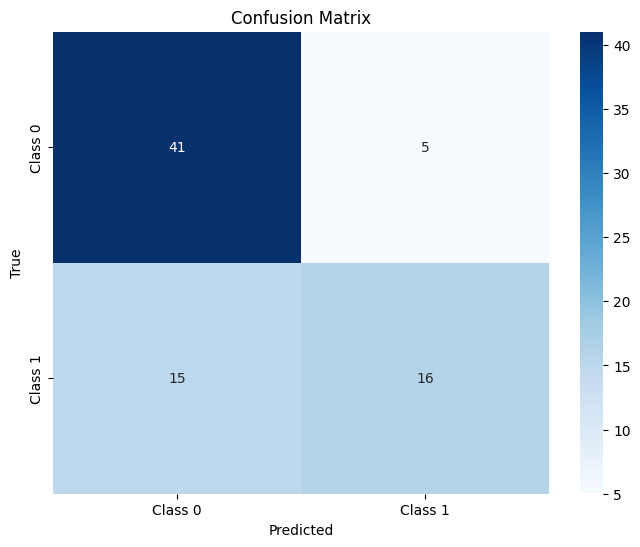

In [ ]:
# Lets have a look into the visualizations

# CONFUSION MATRIX

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

test_predictions = (model(X_test) > 0.5).squeeze().detach().numpy()
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, test_predictions, labels)

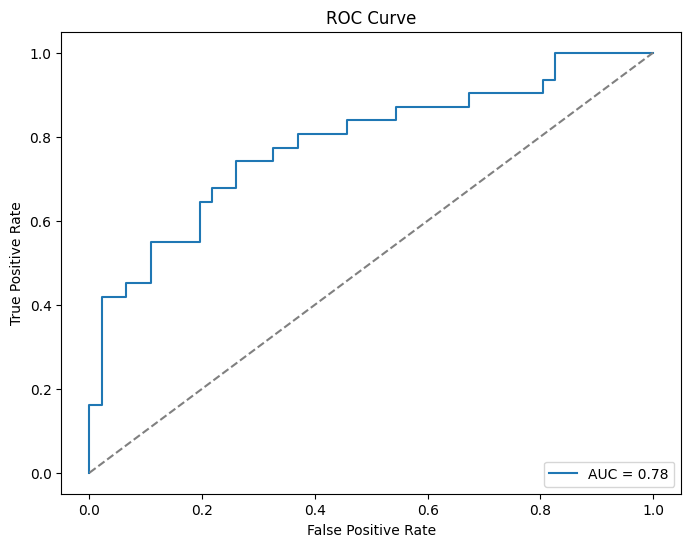

In [ ]:
# ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

test_scores = model(X_test).squeeze().detach().numpy()
plot_roc_curve(y_test, test_scores)

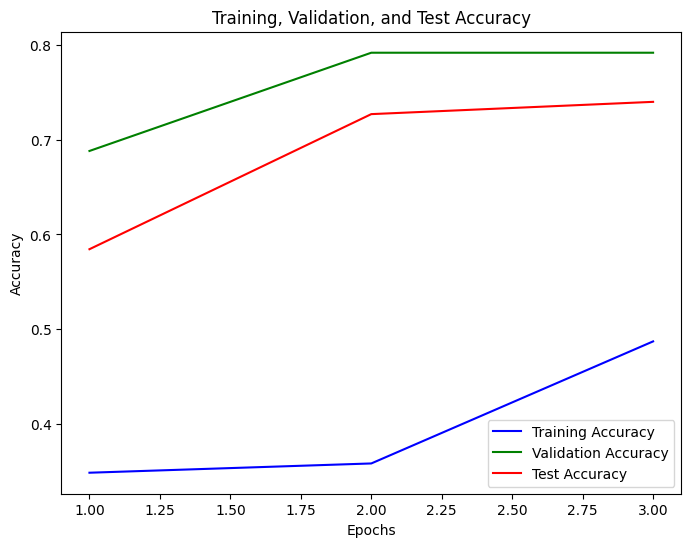

In [ ]:
# Accuracy Comparison Plot

import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy_list_2) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy_list_2, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy_list_2, 'g', label='Validation Accuracy')
plt.plot(epochs, test_accuracy_list_2, 'r', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

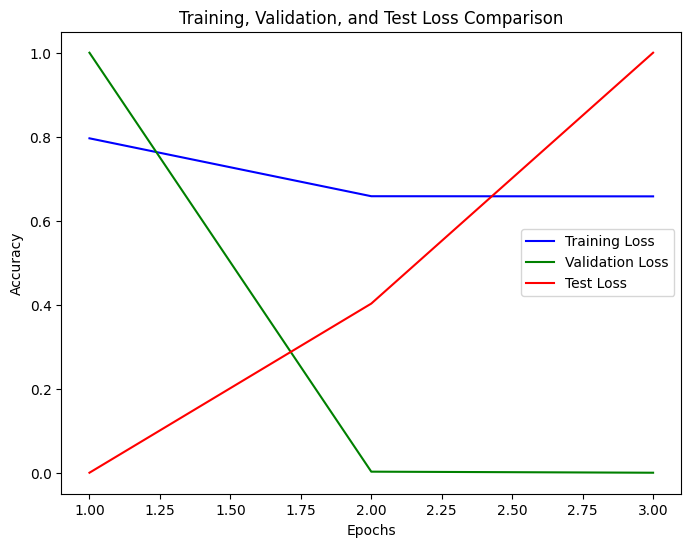

In [ ]:
# Loss Comparison Plot

validation_loss_list_2_scaled = ZeroOneScaling(validation_loss_list_2)
test_loss_list_2_scaled = ZeroOneScaling(test_loss_list_2)

epochs = range(1, len(train_loss_list_1) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list_2, 'b', label='Training Loss')
plt.plot(epochs, validation_loss_list_2_scaled, 'g', label='Validation Loss')
plt.plot(epochs, test_loss_list_2_scaled, 'r', label='Test Loss')
plt.title('Training, Validation, and Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ACTIVATION FUNCTIONS 🔽

In [ ]:
train_accuracy_list_4 = []
validation_accuracy_list_4 = []
test_accuracy_list_4 = []
train_loss_list_4 = []
validation_loss_list_4 = []
test_loss_list_4 = []

results = {}

num_epochs = 10

# Defining the list of activation functions to tune
activation_functions = [nn.ReLU(), nn.LeakyReLU(0.01), nn.Tanh()]

# Looping through different activation functions and record test accuracy
for activation_function in activation_functions:
    model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_function, activation_output, use_dropout=True)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0

        # Iterate over batches of training data
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)

            outputs = torch.sigmoid(outputs)

            train_predictions = (outputs > 0.5).squeeze()
            correct_train += (train_predictions == labels).sum().item()
            total_train += labels.size(0)

            labels = labels.view(-1, 1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        training_accuracy = correct_train / total_train
        training_loss = running_loss / len(train_loader)

        train_accuracy_list_4.append(training_accuracy)
        train_loss_list_4.append(training_loss)

        training_loss = running_loss / len(train_loader)

        # Validation loop
        model.eval()
        correct_valid = 0
        total_valid = 0
        running_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                val_outputs = model(inputs)
                validation_predictions = (val_outputs > 0.5).squeeze()
                correct_valid += (validation_predictions == labels).sum().item()
                total_valid += labels.size(0)

                labels = labels.view(-1, 1)

                val_loss = criterion(val_outputs, labels)
                running_val_loss += val_loss.item()

        valid_accuracy = correct_valid / total_valid
        valid_loss = running_loss / len(valid_loader)

        validation_accuracy_list_4.append(valid_accuracy)
        validation_loss_list_4.append(valid_loss)

        validation_loss = running_val_loss / len(valid_loader)

        # Testing loop
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                test_outputs = model(inputs)
                test_predictions = (test_outputs > 0.5).squeeze()
                correct_test += (test_predictions == labels).sum().item()
                total_test += labels.size(0)

                labels = labels.view(-1, 1)

                test_loss = criterion(test_outputs, labels)
                running_test_loss += test_loss.item()

        testing_accuracy = correct_test / total_test
        test_loss = running_test_loss / len(test_loader)

        test_accuracy_list_4.append(testing_accuracy)
        test_loss_list_4.append(test_loss)

        results[f'Activation {str(activation_function)}'] = testing_accuracy

        # Save the trained and tested model
        torch.save(model.state_dict(), "part_2_Act_Fun_{str(activation_function)}.pth")
        state_dict = torch.load("part_2_Act_Fun_{str(activation_function)}.pth")
        numpy_state_dict = {k: v.cpu().numpy() for k, v in state_dict.items()}
        with h5py.File("part_2_Act_Fun_{str(activation_function)}.h5", "w") as hf:
          for k, v in numpy_state_dict.items():
            hf.create_dataset(k, data=v)

        !cp "part_2_Act_Fun_{str(activation_function)}.h5" "drive/My Drive/"

        model_filename = 'part_2_Act_Fun_{str(activation_function)}.pth'
        torch.save(model.state_dict(), model_filename)

# Print the results in a table
print("Hyperparameter Tuning Results:")
print("{} {}".format("Hyperparameters", "Test Accuracy"))
for hyperparameters, test_accuracy in results.items():
    print("{} {:.6f}".format(hyperparameters, test_accuracy))

Hyperparameter Tuning Results:
Hyperparameters Test Accuracy
Activation ReLU() 0.714286
Activation LeakyReLU(negative_slope=0.01) 0.701299
Activation Tanh() 0.727273


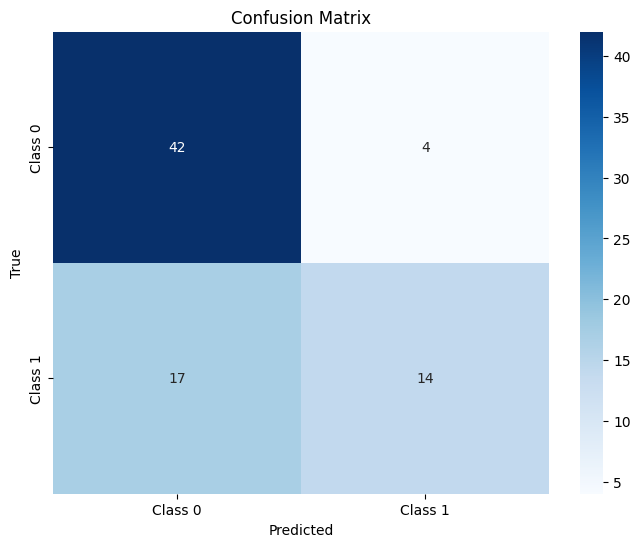

In [ ]:
# Lets have a look into the visualizations

# CONFUSION MATRIX

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

test_predictions = (model(X_test) > 0.5).squeeze().detach().numpy()
labels = ['Class 0', 'Class 1']
plot_confusion_matrix(y_test, test_predictions, labels)

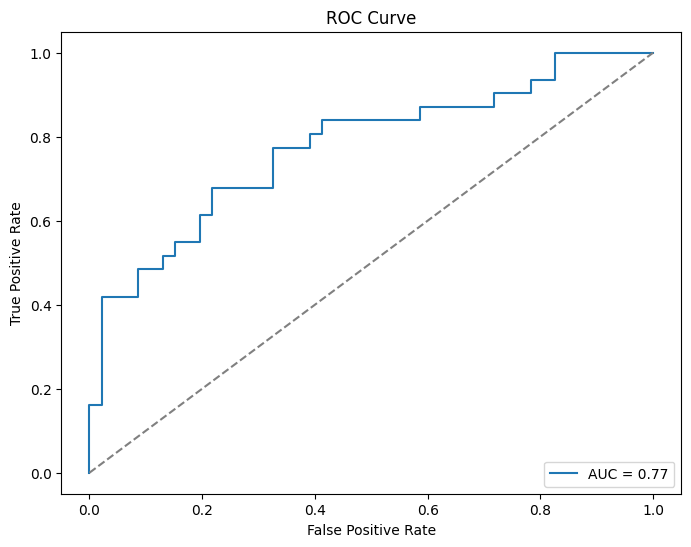

In [ ]:
# ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

test_scores = model(X_test).squeeze().detach().numpy()
plot_roc_curve(y_test, test_scores)

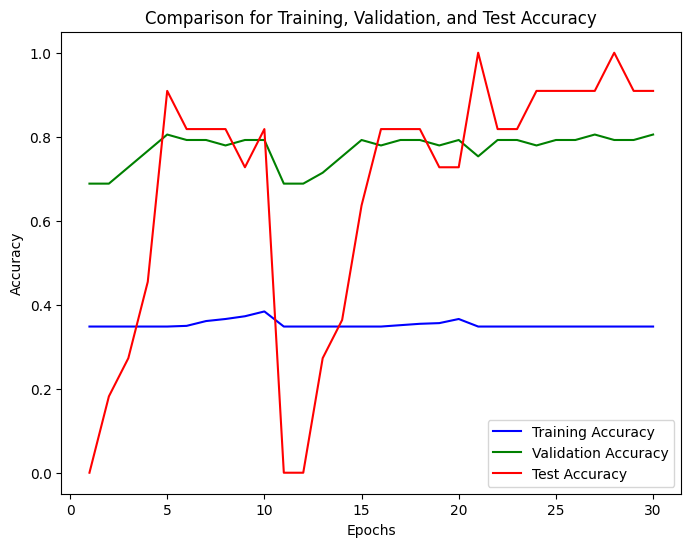

In [ ]:
# Accuracy Comparison Plot

test_accuracy_list_4_scaled = ZeroOneScaling(test_accuracy_list_4)

epochs = range(1, len(train_accuracy_list_4) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy_list_4, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy_list_4, 'g', label='Validation Accuracy')
plt.plot(epochs, test_accuracy_list_4_scaled, 'r', label='Test Accuracy')
plt.title('Comparison for Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

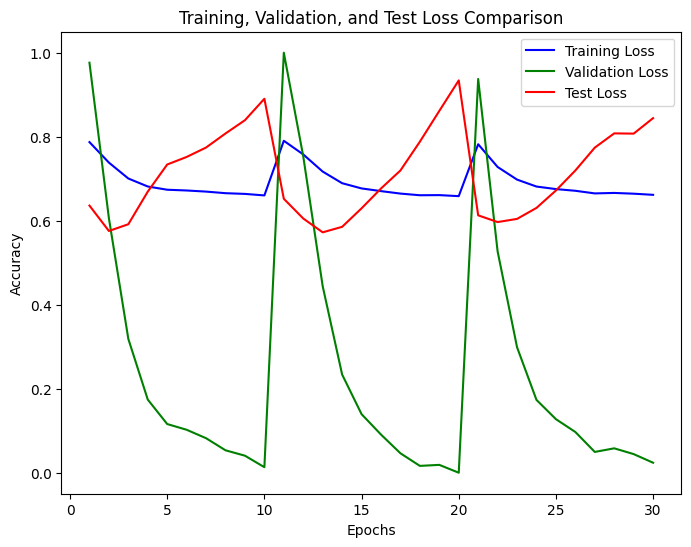

In [ ]:
# Loss Comparison Plot

validation_loss_list_4_scaled = ZeroOneScaling(validation_loss_list_4)

epochs = range(1, len(train_loss_list_4) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list_4, 'b', label='Training Loss')
plt.plot(epochs, validation_loss_list_4_scaled, 'g', label='Validation Loss')
plt.plot(epochs, test_loss_list_4, 'r', label='Test Loss')
plt.title('Training, Validation, and Test Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<br>
<br>

3. In total, we need to submit a base NN model (defined in Part 1) + three NN
models with one changed hyperparameter. E.g., four different NN models, that
have slight changes. You can provide more NN versions on top of these, if
needed.


<br>
<br>

4. After completing step 2, choose a model setup that returns the best accuracy and use it as a ‘base’ model.<br>
There are a few methods which can help increase the training speed, accuracy,
etc. Find and try at least four different methods (e.g. earlystopping, k-fold,
learning rate scheduler, batch normalization)<br>
a. Choose a training optimization method. Add it to your ‘base’ model.<br>
b. Train the model with a new method. Provide a graph that compares test
accuracy for a ‘base’ model and an improved version. You can also
provide comparison w.r.t training time and other parameters.<br>
c. Go to step 4a. Try four various methods or tools.<br>
Note: This step does not involve the use of different optimizers, you can
experiment with various optimizers in Part I.

EARLY STOPPING 🔽

In [ ]:
# Here, I am choosing the first model (that was created with any optimization)
# as my base model asit gave the highest accuracy among all (75.32%)

criterion = nn.BCELoss()

# Set early stopping parameters
early_stopping_patience = 5  # There are the number of epochs to wait before early stopping
best_test_loss = float('inf')
current_patience = 0

# Setting hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Converting DataFrame data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()
#X_test_tensor = torch.Tensor(X_test.values).float()

# Ensuring that the test labels have the same shape as the model's output
# y_test_tensor = torch.Tensor(y_test.values).float()
y_test_tensor = y_test_tensor.view(-1, 1)

# Creating DataLoader instances for your training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create an instance of your neural network
model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Creating the optimizer (Adam, in this case)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_accuracy_list_3 = []
train_loss_list_3 = []
test_accuracy_list_3 = []
test_loss_list_3 = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0

    # Iterating over batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        # Ensuring that labels have the same shape as the model's output
        labels = labels.view(-1, 1)  # Reshape labels to (batch_size, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_3.append(training_accuracy)
    train_loss_list_3.append(training_loss)

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}")

    test_accuracy_list_3.append(testing_accuracy)
    test_loss_list_3.append(test_loss)

    if test_loss < best_test_loss:
        best_test_loss = test_loss
        current_patience = 0
        # Saving the model
        torch.save(model.state_dict(), "part_2_Early_Stopping.pth")
        with h5py.File("part_2_Early_Stopping.h5", "w") as hf:
          {k: v.cpu().numpy() for k, v in torch.load("part_2_Early_Stopping.pth").items()}
          hf.close()

        !cp part_2_Early_Stopping.h5 "drive/My Drive/"
    else:
        current_patience += 1

    if current_patience >= early_stopping_patience:
        print("Early stopping triggered.")
        break

print("Training & Testing finished")


Epoch 1, Training Loss: 0.7848
Epoch 1, Testing Loss: 0.6263
Epoch 2, Training Loss: 0.7370
Epoch 2, Testing Loss: 0.5731
Epoch 3, Training Loss: 0.6949
Epoch 3, Testing Loss: 0.5905
Epoch 4, Training Loss: 0.6792
Epoch 4, Testing Loss: 0.6591
Epoch 5, Training Loss: 0.6747
Epoch 5, Testing Loss: 0.7185
Epoch 6, Training Loss: 0.6717
Epoch 6, Testing Loss: 0.7397
Epoch 7, Training Loss: 0.6691
Epoch 7, Testing Loss: 0.7643
Early stopping triggered.
Training & Testing finished


In [ ]:
# Scaling both the lists

test_accuracy_list_3_scaled = ZeroOneScaling(test_accuracy_list_3)
test_accuracy_list_scaled = ZeroOneScaling(test_accuracy_list)

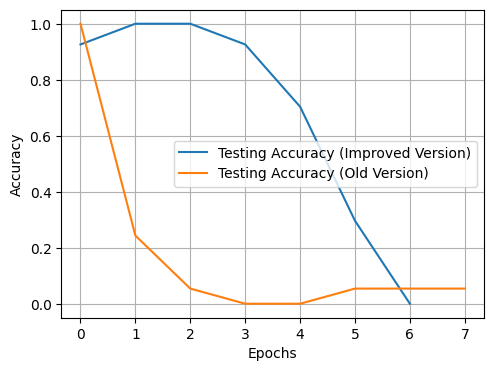

In [ ]:
# Let us compare the acccuracy values of the base model
# and that of improved model (where "Early Stopping" was used)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(test_accuracy_list_3_scaled)), test_accuracy_list_3_scaled, label="Testing Accuracy (Improved Version)")
plt.plot(range(len(test_accuracy_list_scaled[:8])), test_accuracy_list_scaled[:8], label="Testing Accuracy (Old Version)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

K-FOLD 🔽

In [ ]:
from sklearn.model_selection import KFold

criterion = nn.BCELoss()

# Setting hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Converting DataFrame data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()
#X_test_tensor = torch.Tensor(X_test.values).float()

# Number of folds (K)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Ensuring that test labels have the same shape as the model's output
# y_test_tensor = torch.Tensor(y_test.values).float()
y_test_tensor = y_test_tensor.view(-1, 1)

# Creating DataLoader instances for your training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create an instance of your neural network
model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Creating the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_accuracy_list_3 = []
train_loss_list_3 = []
test_accuracy_list_3 = []
test_loss_list_3 = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0

    # Iterating over batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        # Ensuring that labels have the same shape as the model's output
        labels = labels.view(-1, 1)  # Reshape labels to (batch_size, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_3.append(training_accuracy)
    train_loss_list_3.append(training_loss)

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}")

    test_accuracy_list_3.append(testing_accuracy)
    test_loss_list_3.append(test_loss)

    # Saving the model weights
    torch.save(model.state_dict(), "part_2_K_FOLD.pth")
    with h5py.File("part_2_K_FOLD.h5", "w") as hf:
      {k: v.cpu().numpy() for k, v in torch.load("part_2_K_FOLD.pth").items()}
      hf.close()

    !cp part_2_K_FOLD.h5 "drive/My Drive/"

print("Training & Testing finished - K-FOLD")


Epoch 1, Training Loss: 0.7823
Epoch 1, Testing Loss: 0.6365
Epoch 2, Training Loss: 0.7479
Epoch 2, Testing Loss: 0.5887
Epoch 3, Training Loss: 0.7109
Epoch 3, Testing Loss: 0.5724
Epoch 4, Training Loss: 0.6838
Epoch 4, Testing Loss: 0.6053
Epoch 5, Training Loss: 0.6718
Epoch 5, Testing Loss: 0.6616
Epoch 6, Training Loss: 0.6687
Epoch 6, Testing Loss: 0.7141
Epoch 7, Training Loss: 0.6633
Epoch 7, Testing Loss: 0.7641
Epoch 8, Training Loss: 0.6628
Epoch 8, Testing Loss: 0.8215
Epoch 9, Training Loss: 0.6614
Epoch 9, Testing Loss: 0.8699
Epoch 10, Training Loss: 0.6596
Epoch 10, Testing Loss: 0.9361
Training & Testing finished - K-FOLD


In [ ]:
# Scaling both the lists

test_accuracy_list_3_scaled = ZeroOneScaling(test_accuracy_list_3)
test_accuracy_list_scaled = ZeroOneScaling(test_accuracy_list)

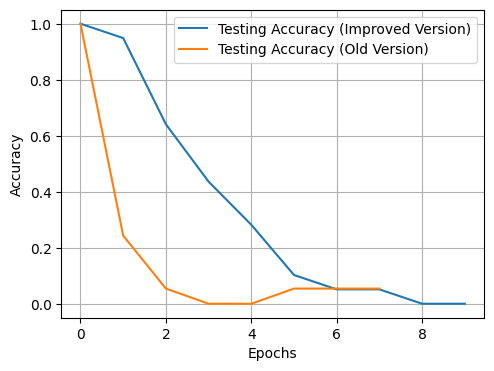

In [ ]:
# Let us compare the acccuracy values of the base model
# and that of improved model (where "K-FOLD" was used)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(test_accuracy_list_3_scaled)), test_accuracy_list_3_scaled, label="Testing Accuracy (Improved Version)")
plt.plot(range(len(test_accuracy_list_scaled[:8])), test_accuracy_list_scaled[:8], label="Testing Accuracy (Old Version)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

LEARNING RATE SCHEDULER 🔽

In [ ]:
# Lets apply "K-Fold" into it

import torch.optim.lr_scheduler as lr_scheduler

criterion = nn.BCELoss()

# Set hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()
#X_test_tensor = torch.Tensor(X_test.values).float()

# y_test_tensor = torch.Tensor(y_test.values).float()
y_test_tensor = y_test_tensor.view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model = SelfNN(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001, threshold_mode='rel')

train_accuracy_list_3 = []
train_loss_list_3 = []
test_accuracy_list_3 = []
test_loss_list_3 = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0

    # Iterating over the batches of training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_3.append(training_accuracy)
    train_loss_list_3.append(training_loss)

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}")

    test_accuracy_list_3.append(testing_accuracy)
    test_loss_list_3.append(test_loss)

    # Adjust the learning rate based on the validation loss
    lr_scheduler.step(test_loss)

    # Saving the model weights
    torch.save(model.state_dict(), "part_2_lr_scheduler.pth")
    with h5py.File("part_2_lr_scheduler.h5", "w") as hf:
      {k: v.cpu().numpy() for k, v in torch.load("part_2_lr_scheduler.pth").items()}
      hf.close()

    !cp part_2_lr_scheduler.h5 "drive/My Drive/"

print("Training & Testing finished - LEARNING RATE SCHEDULER")


Epoch 1, Training Loss: 0.7801
Epoch 1, Testing Loss: 0.6379
Epoch 2, Training Loss: 0.7489
Epoch 2, Testing Loss: 0.5967
Epoch 3, Training Loss: 0.7127
Epoch 3, Testing Loss: 0.5791
Epoch 4, Training Loss: 0.6900
Epoch 4, Testing Loss: 0.6051
Epoch 5, Training Loss: 0.6753
Epoch 5, Testing Loss: 0.6523
Epoch 6, Training Loss: 0.6698
Epoch 6, Testing Loss: 0.6873
Epoch 00006: reducing learning rate of group 0 to 5.0000e-04.
Epoch 7, Training Loss: 0.6661
Epoch 7, Testing Loss: 0.7100
Epoch 8, Training Loss: 0.6638
Epoch 8, Testing Loss: 0.7317
Epoch 9, Training Loss: 0.6620
Epoch 9, Testing Loss: 0.7567
Epoch 00009: reducing learning rate of group 0 to 2.5000e-04.
Epoch 10, Training Loss: 0.6613
Epoch 10, Testing Loss: 0.7655
Training & Testing finished - LEARNING RATE SCHEDULER


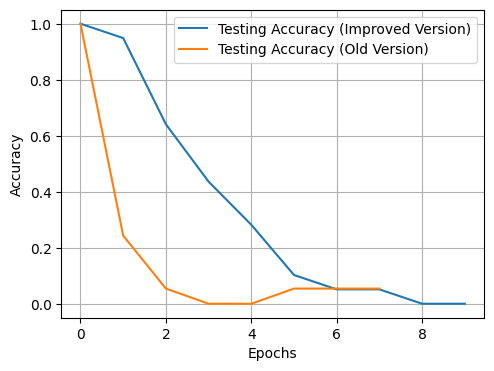

In [ ]:
# Let us compare the acccuracy values of the base model
# and that of improved model (where "Learning Rate Scheduler" was used)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(test_accuracy_list_3_scaled)), test_accuracy_list_3_scaled, label="Testing Accuracy (Improved Version)")
plt.plot(range(len(test_accuracy_list_scaled[:8])), test_accuracy_list_scaled[:8], label="Testing Accuracy (Old Version)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

BATCH NORMALIZATION

In [ ]:
# Lets apply "Batch Normalization" into it

import torch.optim.lr_scheduler as lr_scheduler

criterion = nn.BCELoss()

# Set hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()
#X_test_tensor = torch.Tensor(X_test.values).float()

# y_test_tensor = torch.Tensor(y_test.values).float()
y_test_tensor = y_test_tensor.view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Modifying the NN architecture for batch normalization
class SimpleNNBatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout):
        super(SimpleNNBatchNorm, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.num_hidden_layers = num_hidden_layers

        # Input layer
        self.hidden_layers.append(nn.Linear(input_size, hidden_size[0]))
        self.hidden_layers.append(nn.BatchNorm1d(hidden_size[0]))  # Adding batch normalization
        self.hidden_layers.append(nn.ReLU())
        if use_dropout:
            self.hidden_layers.append(nn.Dropout(0.2))

        # Hidden layers
        for i in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size[i], hidden_size[i + 1]))
            self.hidden_layers.append(nn.BatchNorm1d(hidden_size[i + 1]))  # Adding batch normalization
            self.hidden_layers.append(nn.ReLU())
            if use_dropout:
                self.hidden_layers.append(nn.Dropout(0.2))

        # Output layer
        self.output_layer = nn.Linear(hidden_size[-1], output_size)
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        x = self.output_activation(x)
        return x

# Creating an instance of the neural network
model = SimpleNNBatchNorm(input_size, hidden_size, output_size, num_hidden_layers, activation_hidden, activation_output, use_dropout)

# Creating optimizer (Adam, here)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_accuracy_list_3 = []
train_loss_list_3 = []
test_accuracy_list_3 = []
test_loss_list_3 = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Applying the sigmoid activation function to the model's output
        outputs = torch.sigmoid(outputs)

        train_predictions = (outputs > 0.5).squeeze()
        correct_train += (train_predictions == labels).sum().item()
        total_train += labels.size(0)

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    training_accuracy = correct_train / total_train
    training_loss = running_loss / len(train_loader)

    train_accuracy_list_3.append(training_accuracy)
    train_loss_list_3.append(training_loss)

    training_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {training_loss:.4f}")

    # Testing loop
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            test_outputs = model(inputs)
            test_predictions = (test_outputs > 0.5).squeeze()
            correct_test += (test_predictions == labels).sum().item()
            total_test += labels.size(0)

            test_loss = criterion(test_outputs, labels)
            running_test_loss += test_loss.item()

    testing_accuracy = correct_test / total_test
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch + 1}, Testing Loss: {test_loss:.4f}")

    test_accuracy_list_3.append(testing_accuracy)
    test_loss_list_3.append(test_loss)

     # Saving the model weights
    torch.save(model.state_dict(), "part_2_batch_norm.pth")
    with h5py.File("part_2_batch_norm.h5", "w") as hf:
      {k: v.cpu().numpy() for k, v in torch.load("part_2_batch_norm.pth").items()}
      hf.close()

    !cp part_2_batch_norm.h5 "drive/My Drive/"

print("Training & Testing finished - BATCH NORMALIZATION")


Epoch 1, Training Loss: 0.8260
Epoch 1, Testing Loss: 0.7035
Epoch 2, Training Loss: 0.7979
Epoch 2, Testing Loss: 0.7144
Epoch 3, Training Loss: 0.7799
Epoch 3, Testing Loss: 0.7317
Epoch 4, Training Loss: 0.7605
Epoch 4, Testing Loss: 0.7074
Epoch 5, Training Loss: 0.7520
Epoch 5, Testing Loss: 0.6775
Epoch 6, Training Loss: 0.7430
Epoch 6, Testing Loss: 0.6546
Epoch 7, Training Loss: 0.7355
Epoch 7, Testing Loss: 0.6241
Epoch 8, Training Loss: 0.7325
Epoch 8, Testing Loss: 0.6091
Epoch 9, Training Loss: 0.7219
Epoch 9, Testing Loss: 0.5940
Epoch 10, Training Loss: 0.7185
Epoch 10, Testing Loss: 0.5918
Training & Testing finished - BATCH NORMALIZATION


In [ ]:
# Scaling both the lists

test_accuracy_list_3_scaled = ZeroOneScaling(test_accuracy_list_3)
test_accuracy_list_scaled = ZeroOneScaling(test_accuracy_list)

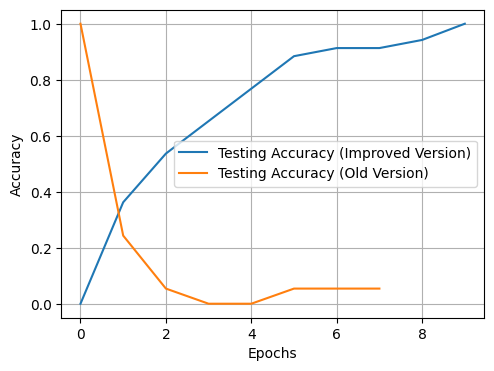

In [ ]:
# Let us compare the acccuracy values of the base model
# and that of improved model (where "Learning Rate Scheduler" was used)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(test_accuracy_list_3_scaled)), test_accuracy_list_3_scaled, label="Testing Accuracy (Improved Version)")
plt.plot(range(len(test_accuracy_list_scaled[:8])), test_accuracy_list_scaled[:8], label="Testing Accuracy (Old Version)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()